<a href="https://colab.research.google.com/github/molecools/molecular-docking/blob/main/CompoundsAnnotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Compounds-annotation.csv')

In [ ]:
df

DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
1          3            MGH              Rapamycin   
2          5            MGH              Sunitinib   
3          6            MGH             PHA-665752   
4          9            MGH                 MG-132   
..       ...            ...                    ...   
616     2362         SANGER                THR-103   
617     2438         SANGER  ascorbate (vitamin C)   
618     2439         SANGER            glutathione   
619     2498         SANGER      alpha-lipoic acid   
620     2499         SANGER      N-acetyl cysteine   

                                              SYNONYMS  \
0    Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1    AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                   Sutent, Sunitinib Malate, SU-11248   
3                                PHA665752, PHA 665752   
4                               LLL cpd, MG 132, MG132   
..                                                 ...   
616                                     WIMM synthesis   
617                        back-up solution from YWKim   
618                                       G6013, sigma   
619                                                aLA   
620                                                NAC   

                                  TARGET                     TARGET_PATHWAY  
0                                   EGFR                     EGFR signaling  
1                                 MTORC1                PI3K/MTOR signaling  
2    PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling  
3                                    MET                      RTK signaling  
4                      Proteasome, CAPN1  Protein stability and degradation  
..                                   ...                                ...  
616                           Mutant RAS                PI3K/MTOR signaling  
617                anti-oxidant proteins                              Other  
618                anti-oxidant proteins                              Other  
619                           Metabolism                         Metabolism  
620                           Metabolism                         Metabolism  

[621 rows x 6 columns]

from matplotlib import pyplot as plt
df['DRUG_ID'].plot(kind='hist', bins=20, title='DRUG_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('SCREENING_SITE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DRUG_ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DRUG_ID'}, axis=1)
              .sort_values('DRUG_ID', ascending=True))
  xs = counted['DRUG_ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('DRUG_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('SCREENING_SITE')):
  _plot_series(series, series_name, i)
  fig.legend(title='SCREENING_SITE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DRUG_ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['DRUG_ID'].plot(kind='line', figsize=(8, 4), title='DRUG_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['SCREENING_SITE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='DRUG_ID', y='SCREENING_SITE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

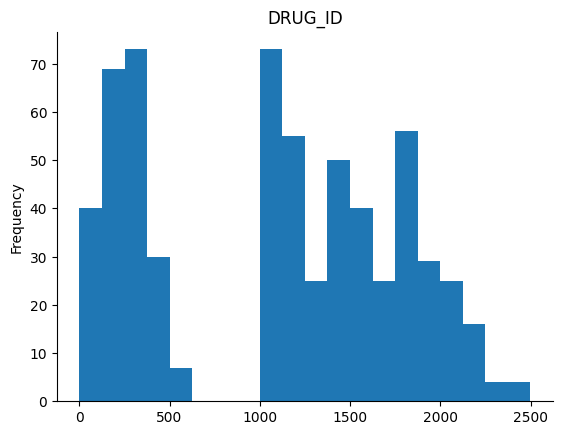

In [ ]:
from matplotlib import pyplot as plt
df['DRUG_ID'].plot(kind='hist', bins=20, title='DRUG_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

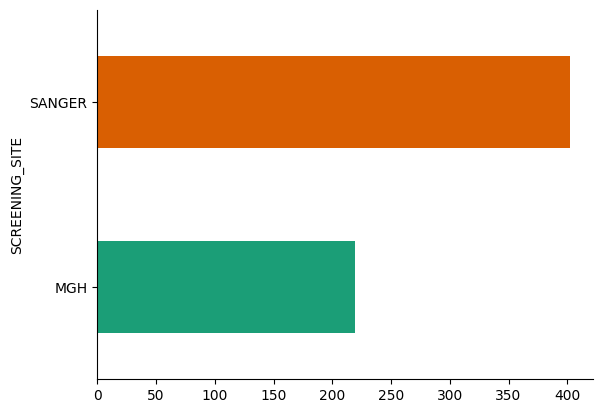

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('SCREENING_SITE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

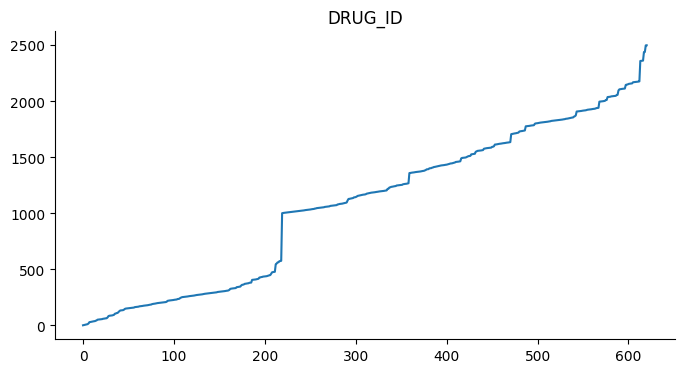

In [ ]:
from matplotlib import pyplot as plt
df['DRUG_ID'].plot(kind='line', figsize=(8, 4), title='DRUG_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-11-c2497e21d309>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='DRUG_ID', y='SCREENING_SITE', inner='box', palette='Dark2')


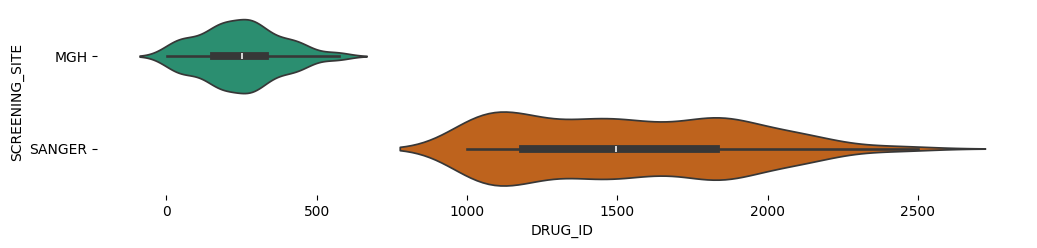

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['SCREENING_SITE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='DRUG_ID', y='SCREENING_SITE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Replace NaN values in the "SYNONYMS" column with "X1"
df['SYNONYMS'].fillna('X1', inplace=True)

# Replace NaN values in the "TARGET" column with "p53"
df['TARGET'].fillna('p53', inplace=True)

<ipython-input-12-4b393893cf5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SYNONYMS'].fillna('X1', inplace=True)
<ipython-input-12-4b393893cf5b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
df

DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
1          3            MGH              Rapamycin   
2          5            MGH              Sunitinib   
3          6            MGH             PHA-665752   
4          9            MGH                 MG-132   
..       ...            ...                    ...   
616     2362         SANGER                THR-103   
617     2438         SANGER  ascorbate (vitamin C)   
618     2439         SANGER            glutathione   
619     2498         SANGER      alpha-lipoic acid   
620     2499         SANGER      N-acetyl cysteine   

                                              SYNONYMS  \
0    Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1    AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                   Sutent, Sunitinib Malate, SU-11248   
3                                PHA665752, PHA 665752   
4                               LLL cpd, MG 132, MG132   
..                                                 ...   
616                                     WIMM synthesis   
617                        back-up solution from YWKim   
618                                       G6013, sigma   
619                                                aLA   
620                                                NAC   

                                  TARGET                     TARGET_PATHWAY  
0                                   EGFR                     EGFR signaling  
1                                 MTORC1                PI3K/MTOR signaling  
2    PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling  
3                                    MET                      RTK signaling  
4                      Proteasome, CAPN1  Protein stability and degradation  
..                                   ...                                ...  
616                           Mutant RAS                PI3K/MTOR signaling  
617                anti-oxidant proteins                              Other  
618                anti-oxidant proteins                              Other  
619                           Metabolism                         Metabolism  
620                           Metabolism                         Metabolism  

[621 rows x 6 columns]

In [ ]:
df.head(10)

DRUG_ID SCREENING_SITE    DRUG_NAME  \
0        1            MGH    Erlotinib   
1        3            MGH    Rapamycin   
2        5            MGH    Sunitinib   
3        6            MGH   PHA-665752   
4        9            MGH       MG-132   
5       11            MGH   Paclitaxel   
6       17            MGH  Cyclopamine   
7       29            MGH        AZ628   
8       30            MGH    Sorafenib   
9       32            MGH   Tozasertib   

                                            SYNONYMS  \
0  Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1  AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                 Sutent, Sunitinib Malate, SU-11248   
3                              PHA665752, PHA 665752   
4                             LLL cpd, MG 132, MG132   
5  BMS-181339-01, Taxol, Onxol, Paxene, Praxel, A...   
6                                                 X1   
7                                     AZ-628, AZ 628   
8                  Nexavar, 284461-73-0, BAY 43-9006   
9        MK 0457,MK-0457,MK-045, VX-680 VX 680 VX-68   

                                TARGET                     TARGET_PATHWAY  
0                                 EGFR                     EGFR signaling  
1                               MTORC1                PI3K/MTOR signaling  
2  PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling  
3                                  MET                      RTK signaling  
4                    Proteasome, CAPN1  Protein stability and degradation  
5               Microtubule stabiliser                            Mitosis  
6                                  SMO                              Other  
7                                 BRAF                 ERK MAPK signaling  
8               PDGFR, KIT, VEGFR, RAF                      RTK signaling  
9          AURKA, AURKB, AURKC, others                            Mitosis

In [ ]:
# Replace 'Unclassified' values in the "TARGET_PATHWAY" column with 'Redox signalling'
df['TARGET_PATHWAY'] = df['TARGET_PATHWAY'].replace('Unclassified', 'Redox signalling')

In [ ]:
# Count the number of unique drugs
num_unique_drugs = df['DRUG_NAME'].nunique()
print(f"Number of unique drugs: {num_unique_drugs}")

# Count the number of unique targets
num_unique_targets = df['TARGET'].nunique()
print(f"Number of unique targets: {num_unique_targets}")

# Count the number of unique pathways
num_unique_pathways = df['TARGET_PATHWAY'].nunique()
print(f"Number of unique pathways: {num_unique_pathways}")

# Summarize the distribution of drug types
drug_type_counts = df['DRUG_NAME'].value_counts()
print("\nDistribution of Drug Types:")
print(drug_type_counts)

# Summarize the distribution of targets
target_counts = df['TARGET'].value_counts()
print("\nDistribution of Targets:")
print(target_counts)

# Summarize the distribution of pathways
pathway_counts = df['TARGET_PATHWAY'].value_counts()
print("\nDistribution of Pathways:")
print(pathway_counts)

Number of unique drugs: 542
Number of unique targets: 370
Number of unique pathways: 24

Distribution of Drug Types:
DRUG_NAME
AZD4547              3
AZD6482              3
JQ1                  3
CHIR-99021           3
UNC0638              3
                    ..
Flavopiridol         1
Pemetrexed           1
Ara-G                1
CAY10566             1
N-acetyl cysteine    1
Name: count, Length: 542, dtype: int64

Distribution of Targets:
TARGET
p53                                     42
AKT1, AKT2, AKT3                         9
MEK1, MEK2                               8
EGFR                                     7
IGF1R, IR                                6
                                        ..
HDAC inhibitor Class I, IIa, IIb, IV     1
ABL                                      1
SRC, ABL, TEC                            1
CRBN                                     1
RAS effector                             1
Name: count, Length: 370, dtype: int64

Distribution of Pathways:
TARGET_PA

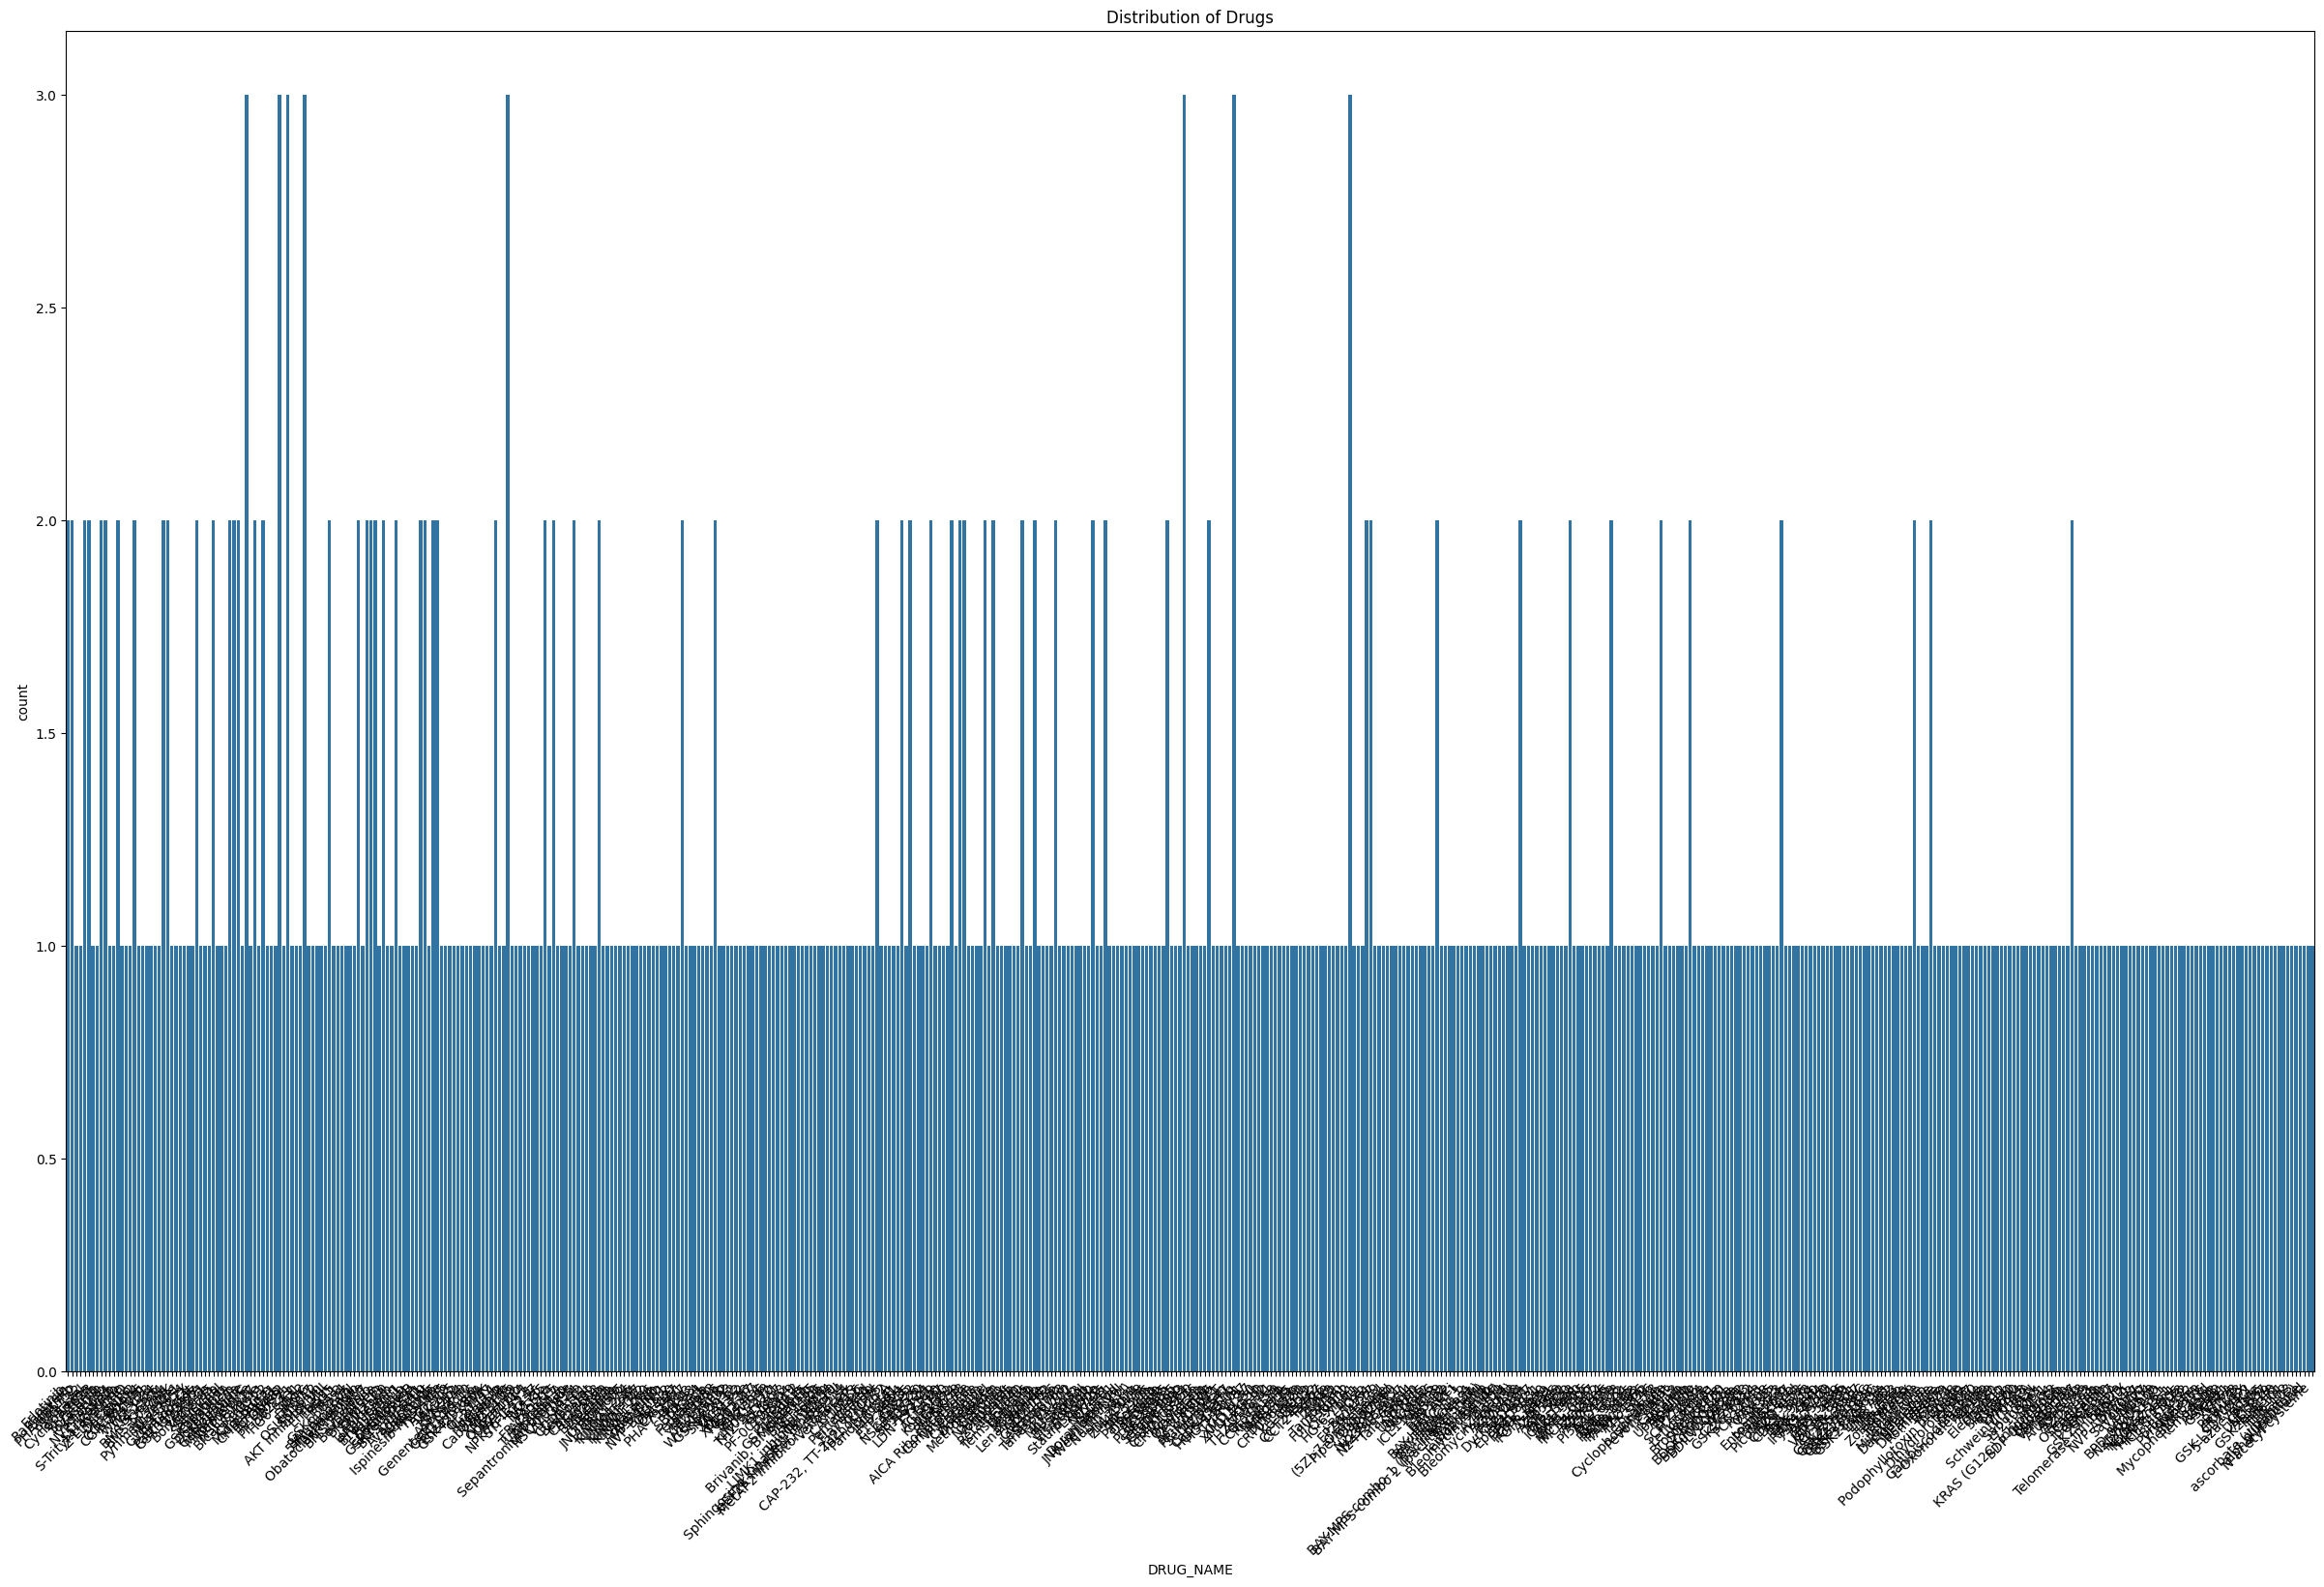

In [ ]:
# 1. Visualize the distribution of drugs
plt.figure(figsize=(30, 18))
sns.countplot(x='DRUG_NAME', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Drugs')
plt.show()

In [ ]:
df.columns

Index(['DRUG_ID', 'SCREENING_SITE', 'DRUG_NAME', 'SYNONYMS', 'TARGET',
       'TARGET_PATHWAY'],
      dtype='object')

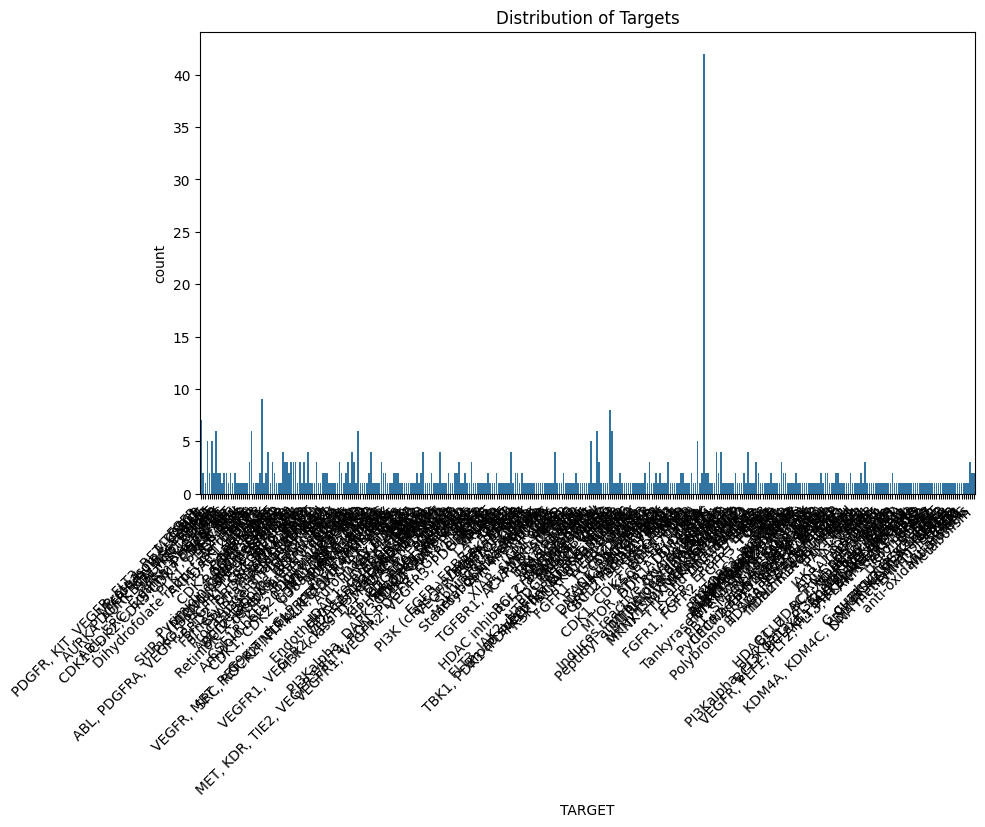

In [ ]:
# 2. Visualize the distribution of targets
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Targets')
plt.show()

In [53]:
import pandas as pd



# Replace NaN values in the "SYNONYMS" column with "X1"
df['SYNONYMS'].fillna('X1', inplace=True)

# Replace NaN values in the "TARGET" column with "p53"
df['TARGET'].fillna('p53', inplace=True)


# Replace 'Unclassified' values in the "TARGET_PATHWAY" column with 'Redox signalling'
df['TARGET_PATHWAY'] = df['TARGET_PATHWAY'].replace('Unclassified', 'Redox signalling')

<ipython-input-53-db2964630955>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SYNONYMS'].fillna('X1', inplace=True)
<ipython-input-53-db2964630955>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [54]:
df


DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
1          3            MGH              Rapamycin   
2          5            MGH              Sunitinib   
3          6            MGH             PHA-665752   
4          9            MGH                 MG-132   
..       ...            ...                    ...   
616     2362         SANGER                THR-103   
617     2438         SANGER  ascorbate (vitamin C)   
618     2439         SANGER            glutathione   
619     2498         SANGER      alpha-lipoic acid   
620     2499         SANGER      N-acetyl cysteine   

                                              SYNONYMS  \
0    Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1    AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                   Sutent, Sunitinib Malate, SU-11248   
3                                PHA665752, PHA 665752   
4                               LLL cpd, MG 132, MG132   
..                                                 ...   
616                                     WIMM synthesis   
617                        back-up solution from YWKim   
618                                       G6013, sigma   
619                                                aLA   
620                                                NAC   

                                  TARGET                     TARGET_PATHWAY  
0                                   EGFR                     EGFR signaling  
1                                 MTORC1                PI3K/MTOR signaling  
2    PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling  
3                                    MET                      RTK signaling  
4                      Proteasome, CAPN1  Protein stability and degradation  
..                                   ...                                ...  
616                           Mutant RAS                PI3K/MTOR signaling  
617                anti-oxidant proteins                              Other  
618                anti-oxidant proteins                              Other  
619                           Metabolism                         Metabolism  
620                           Metabolism                         Metabolism  

[621 rows x 6 columns]

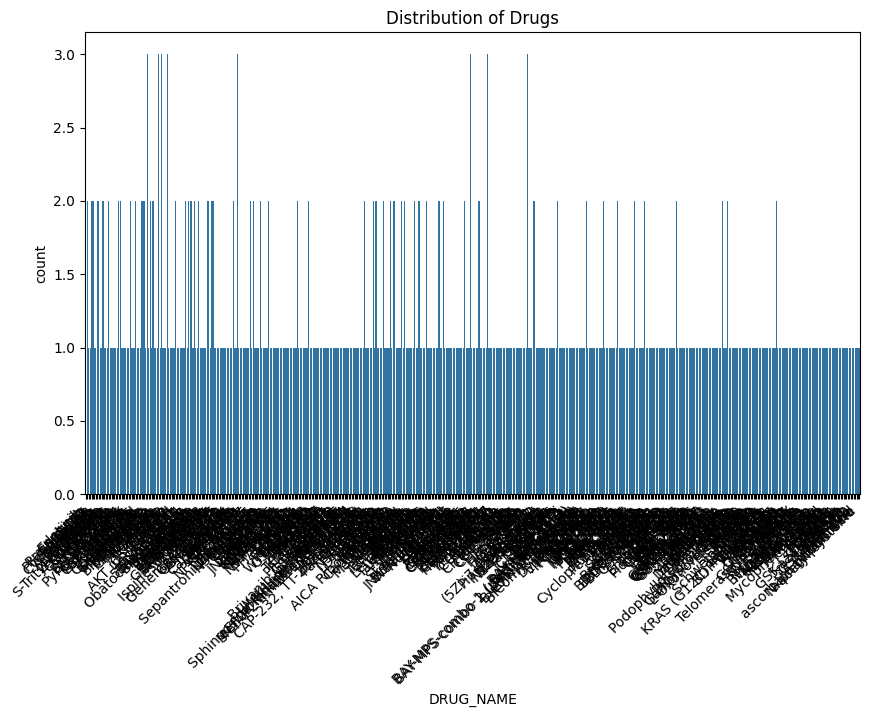

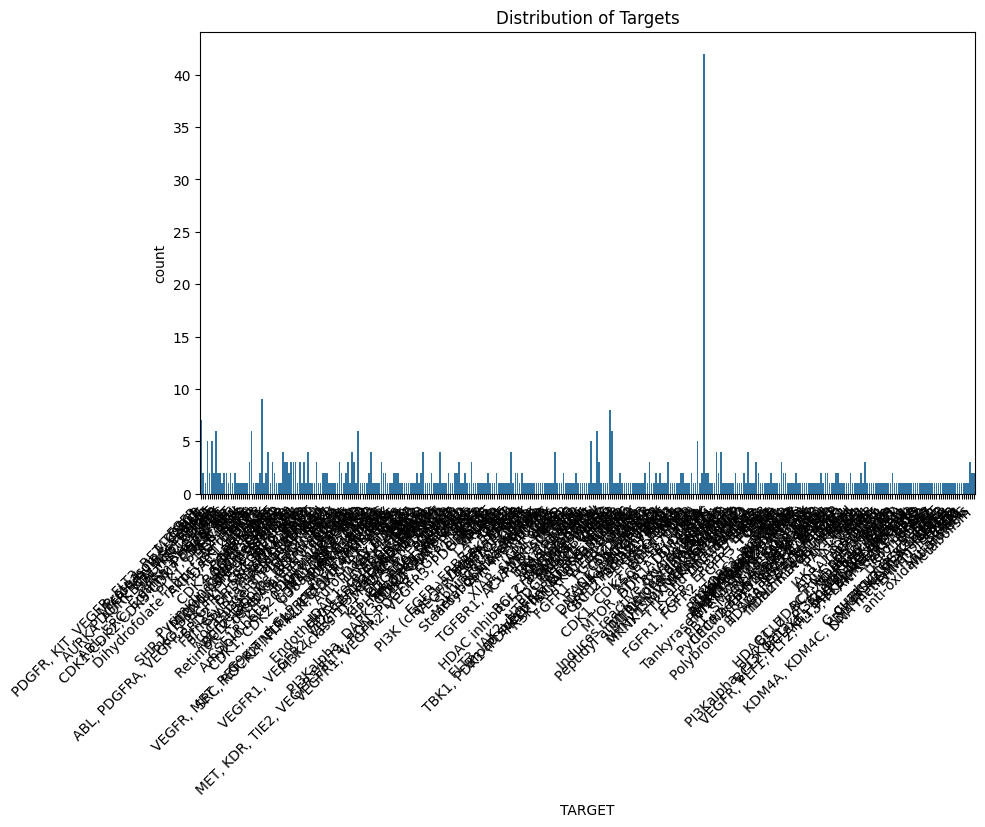

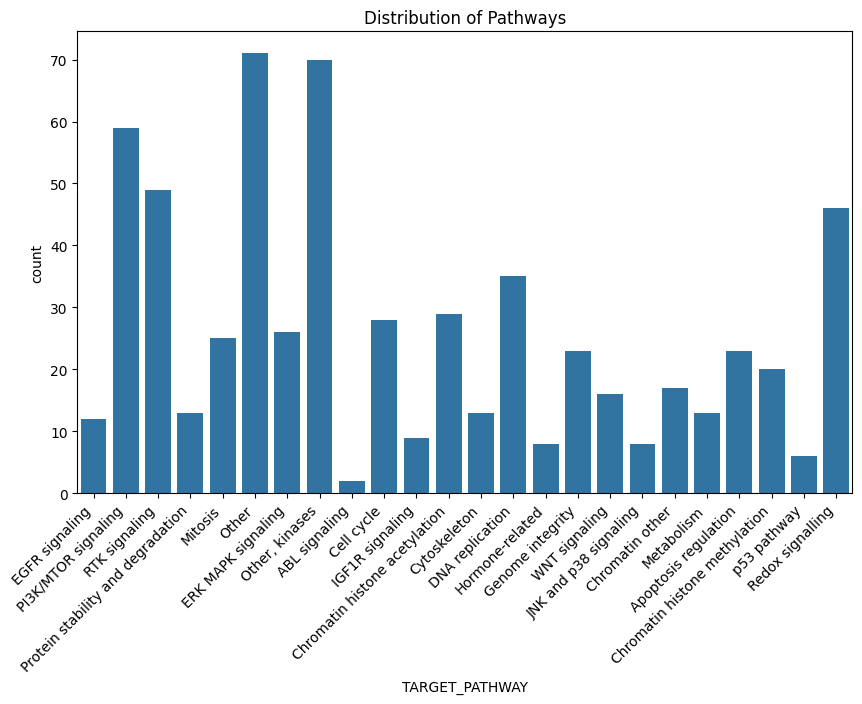

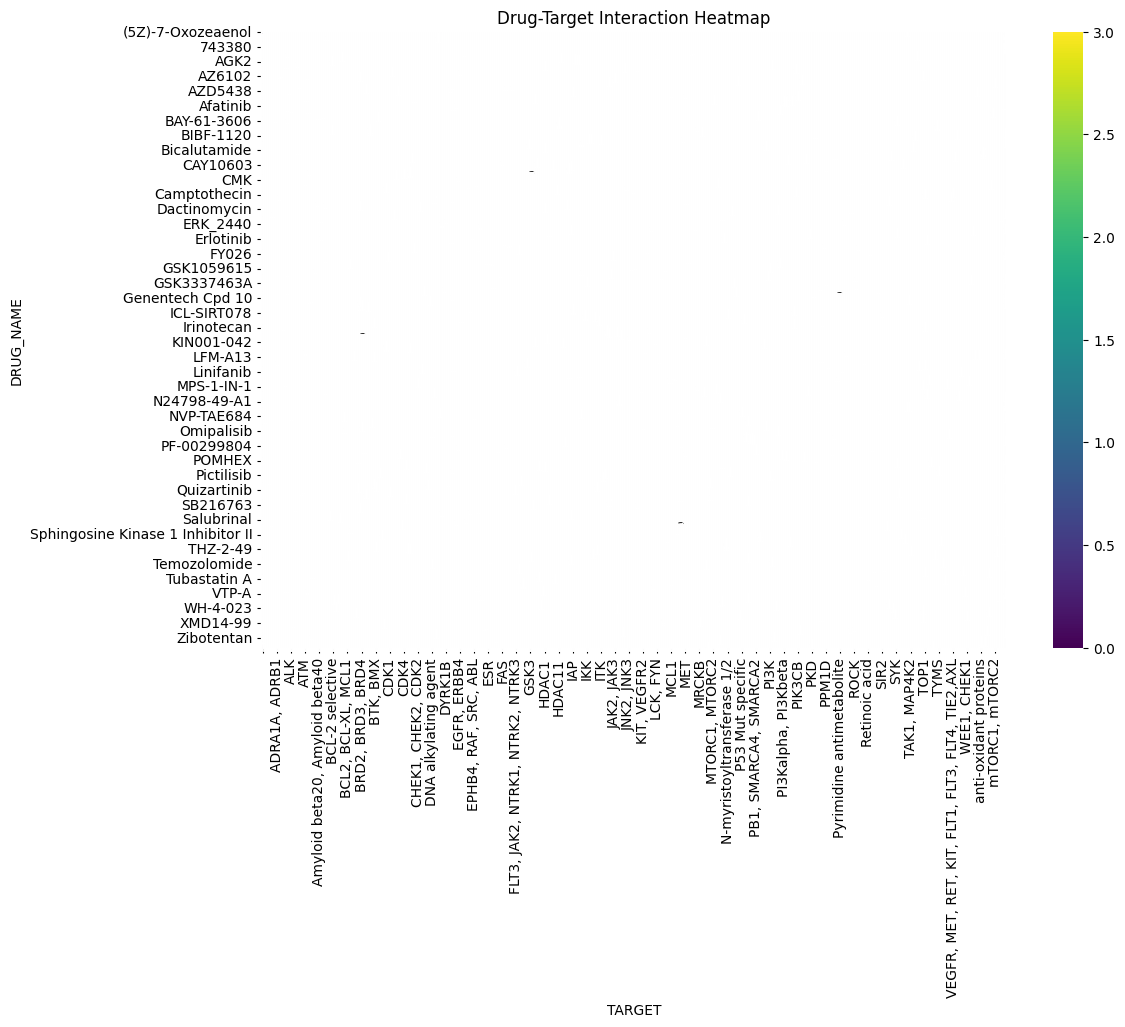

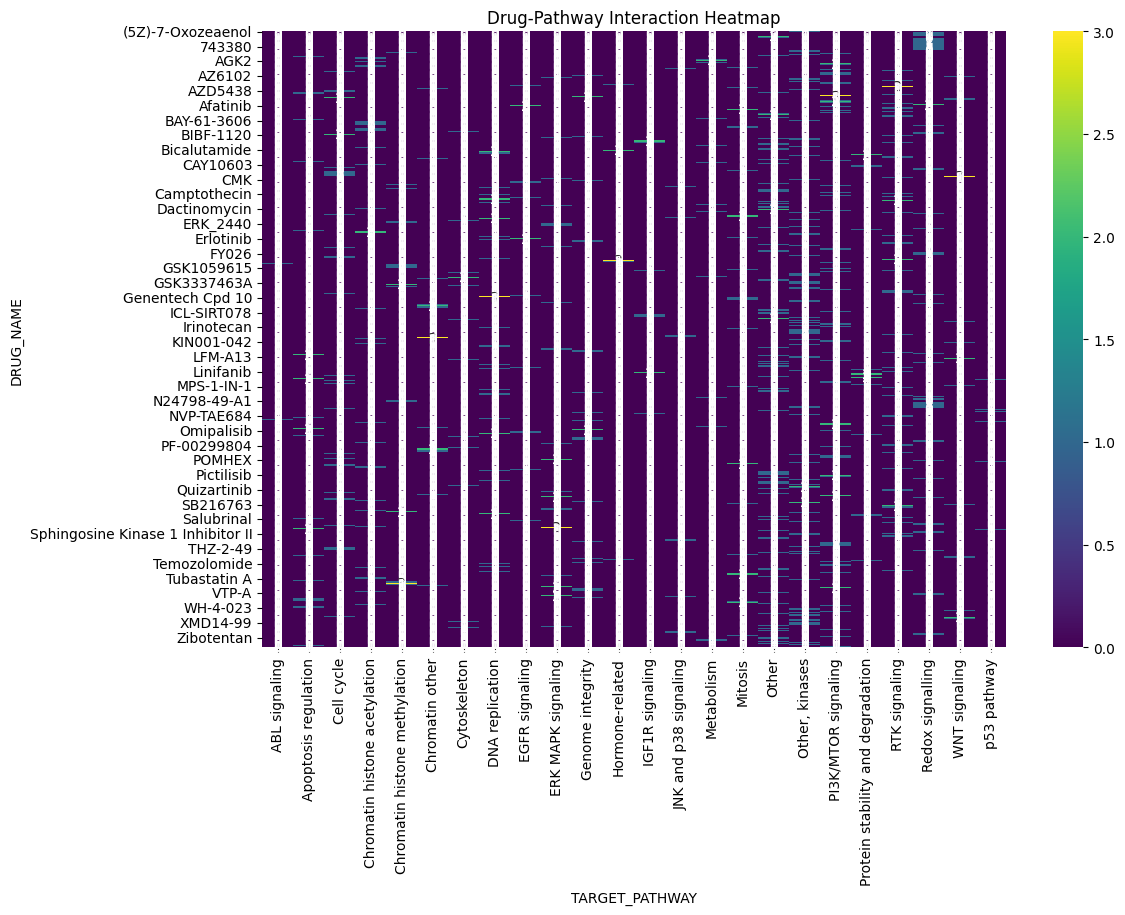

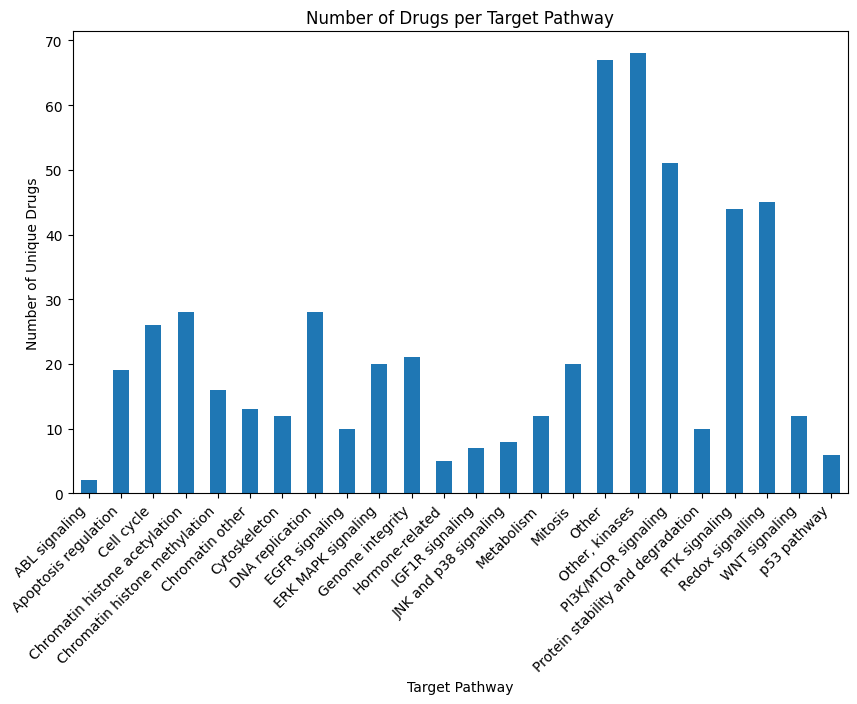

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# 1. Visualize the distribution of drugs
plt.figure(figsize=(10, 6))
sns.countplot(x='DRUG_NAME', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Drugs')
plt.show()

# 2. Visualize the distribution of targets
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Targets')
plt.show()

# 3. Visualize the distribution of pathways
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET_PATHWAY', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Pathways')
plt.show()

# 4. Create a heatmap of drug-target interactions
drug_target_counts = df.pivot_table(index='DRUG_NAME', columns='TARGET', values='DRUG_ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(drug_target_counts, cmap='viridis', annot=True)
plt.title('Drug-Target Interaction Heatmap')
plt.show()

# 5. Create a heatmap of drug-pathway interactions
drug_pathway_counts = df.pivot_table(index='DRUG_NAME', columns='TARGET_PATHWAY', values='DRUG_ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(drug_pathway_counts, cmap='viridis', annot=True)
plt.title('Drug-Pathway Interaction Heatmap')
plt.show()

# 6. Analyze trends (example: count of drugs per target pathway)
target_pathway_drug_counts = df.groupby('TARGET_PATHWAY')['DRUG_NAME'].nunique()
plt.figure(figsize=(10, 6))
target_pathway_drug_counts.plot(kind='bar')
plt.xlabel('Target Pathway')
plt.ylabel('Number of Unique Drugs')
plt.title('Number of Drugs per Target Pathway')
plt.xticks(rotation=45, ha='right')
plt.show()

In [57]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Count the number of unique drugs
unique_drugs = df['DRUG_NAME'].nunique()
print(f"Number of unique drugs: {unique_drugs}")

# Count the number of unique targets
unique_targets = df['TARGET'].nunique()
print(f"Number of unique targets: {unique_targets}")

# Count the number of unique pathways
unique_pathways = df['TARGET_PATHWAY'].nunique()
print(f"Number of unique pathways: {unique_pathways}")

# Summarize the distribution of drug types, targets, and pathways
print("\nDistribution of Drug Types:")
print(df['DRUG_NAME'].value_counts())

print("\nDistribution of Targets:")
print(df['TARGET'].value_counts())

print("\nDistribution of Pathways:")
print(df['TARGET_PATHWAY'].value_counts())

Number of unique drugs: 542
Number of unique targets: 370
Number of unique pathways: 24

Distribution of Drug Types:
DRUG_NAME
AZD4547              3
AZD6482              3
JQ1                  3
CHIR-99021           3
UNC0638              3
                    ..
Flavopiridol         1
Pemetrexed           1
Ara-G                1
CAY10566             1
N-acetyl cysteine    1
Name: count, Length: 542, dtype: int64

Distribution of Targets:
TARGET
p53                                     42
AKT1, AKT2, AKT3                         9
MEK1, MEK2                               8
EGFR                                     7
IGF1R, IR                                6
                                        ..
HDAC inhibitor Class I, IIa, IIb, IV     1
ABL                                      1
SRC, ABL, TEC                            1
CRBN                                     1
RAS effector                             1
Name: count, Length: 370, dtype: int64

Distribution of Pathways:
TARGET_PA

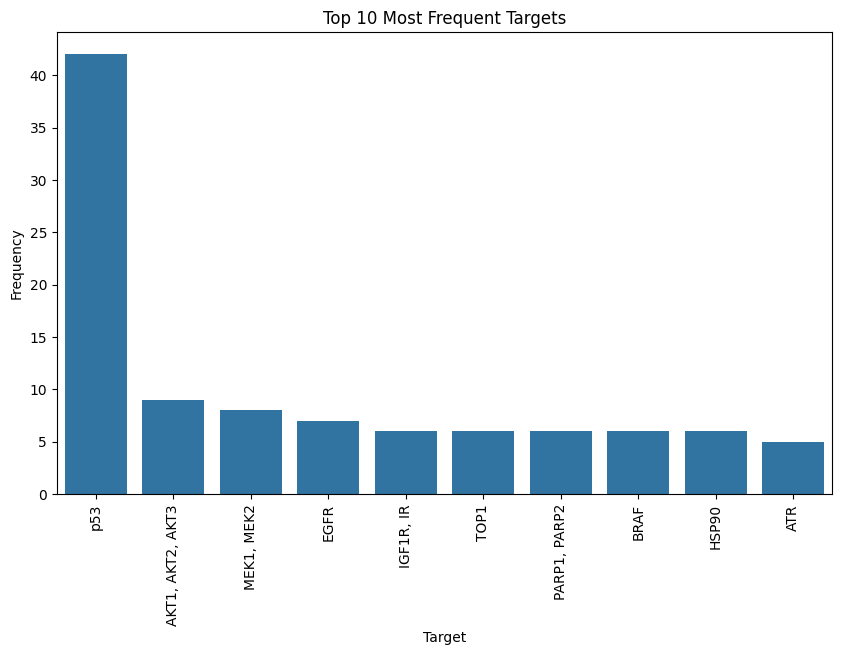

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Bar chart: Top 10 most frequent targets
top_targets = df['TARGET'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_targets.index, y=top_targets.values)
plt.title('Top 10 Most Frequent Targets')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

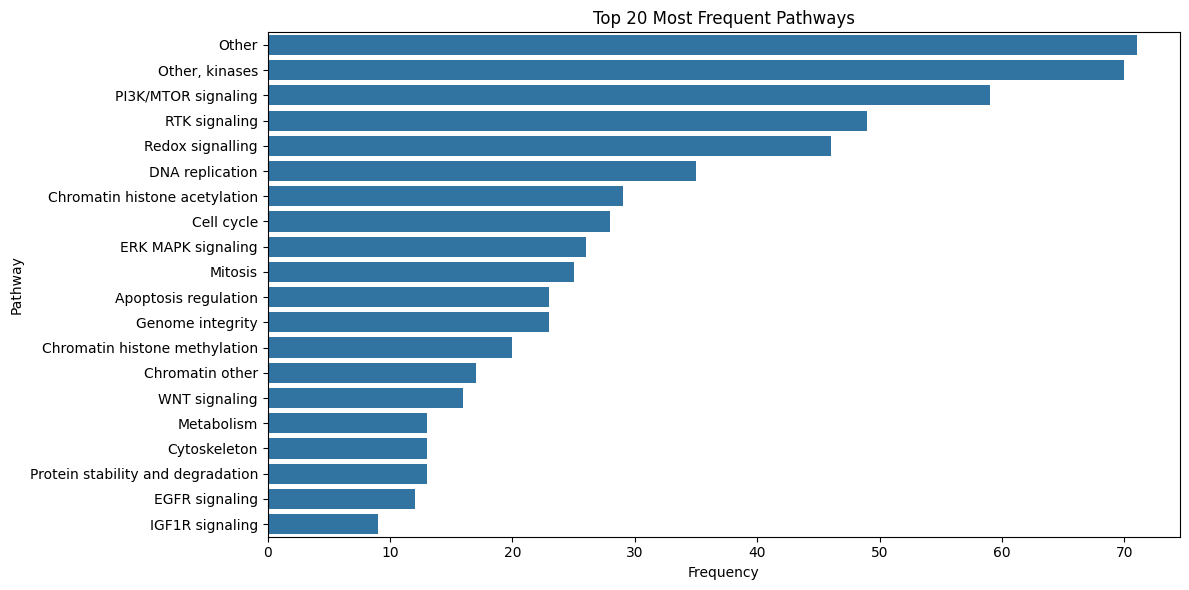

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Bar chart: Top 20 most frequent pathways (horizontal)
top_pathways = df['TARGET_PATHWAY'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pathways.values, y=top_pathways.index, orient='h')
plt.title('Top 20 Most Frequent Pathways')
plt.xlabel('Frequency')
plt.ylabel('Pathway')
plt.tight_layout()  # Adjust spacing to prevent overlapping labels
plt.show()

<ipython-input-60-7dffc98841b4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pathways.values, y=top_pathways.index, orient='h', palette='husl')  # Use 'husl' for a vibrant color palette


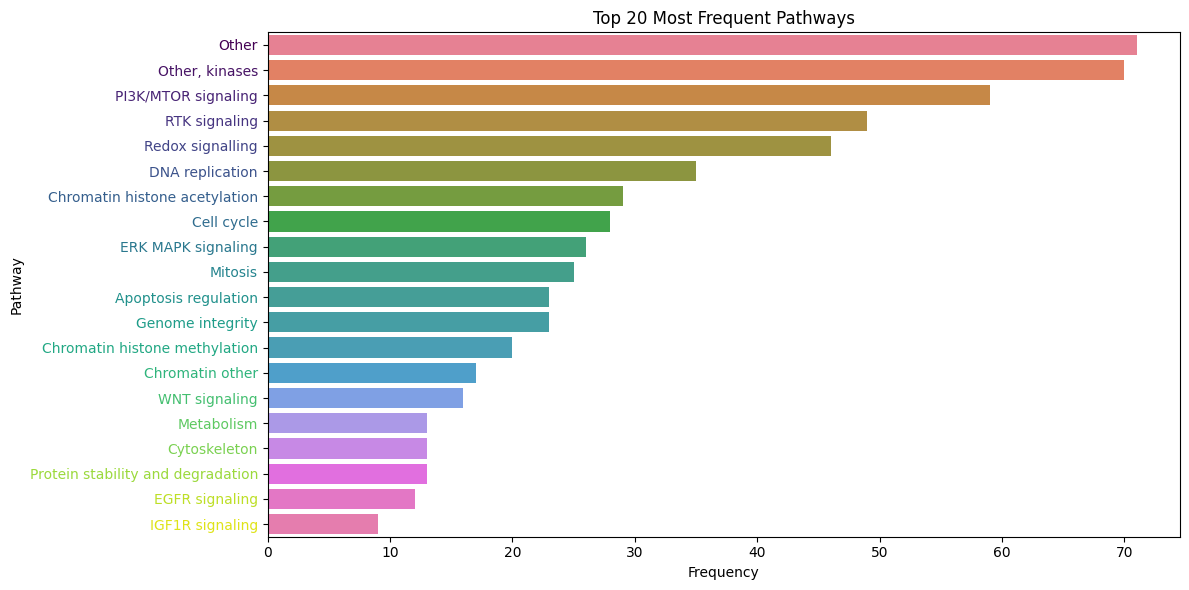

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Bar chart: Top 20 most frequent pathways (horizontal) with colored bars and labels
top_pathways = df['TARGET_PATHWAY'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pathways.values, y=top_pathways.index, orient='h', palette='husl')  # Use 'husl' for a vibrant color palette
plt.title('Top 20 Most Frequent Pathways')
plt.xlabel('Frequency')
plt.ylabel('Pathway')

# Color y-axis labels
for i, label in enumerate(plt.gca().get_yticklabels()):
    label.set_color(plt.cm.viridis(i/len(plt.gca().get_yticklabels())))

plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# 1. Define a function to assign drug effectiveness scores
#    (This is a simplified example and may need adjustment based on your specific data and knowledge domain)
def assign_drug_effectiveness(row):
  """
  Assigns a random effectiveness score between 0 and 1.
  This is a placeholder for a more realistic approach.

  Args:
    row: A single row of the DataFrame.

  Returns:
    A random float between 0 and 1.
  """
  return np.random.rand()

# 2. Apply the function to create the 'Drug_Effectiveness' column
df['Drug_Effectiveness'] = df.apply(assign_drug_effectiveness, axis=1)

# 3. (Optional) Adjust effectiveness scores based on specific criteria
#    (e.g., target, pathway, drug properties)
#    - This would require domain expertise and access to relevant data.

# Example:
# If you have information about drug approval status:
# df.loc[df['Approval_Status'] == 'Approved', 'Drug_Effectiveness'] += 0.2

# Now you can use the 'Drug_Effectiveness' column for further analysis
# (as shown in the previous responses)

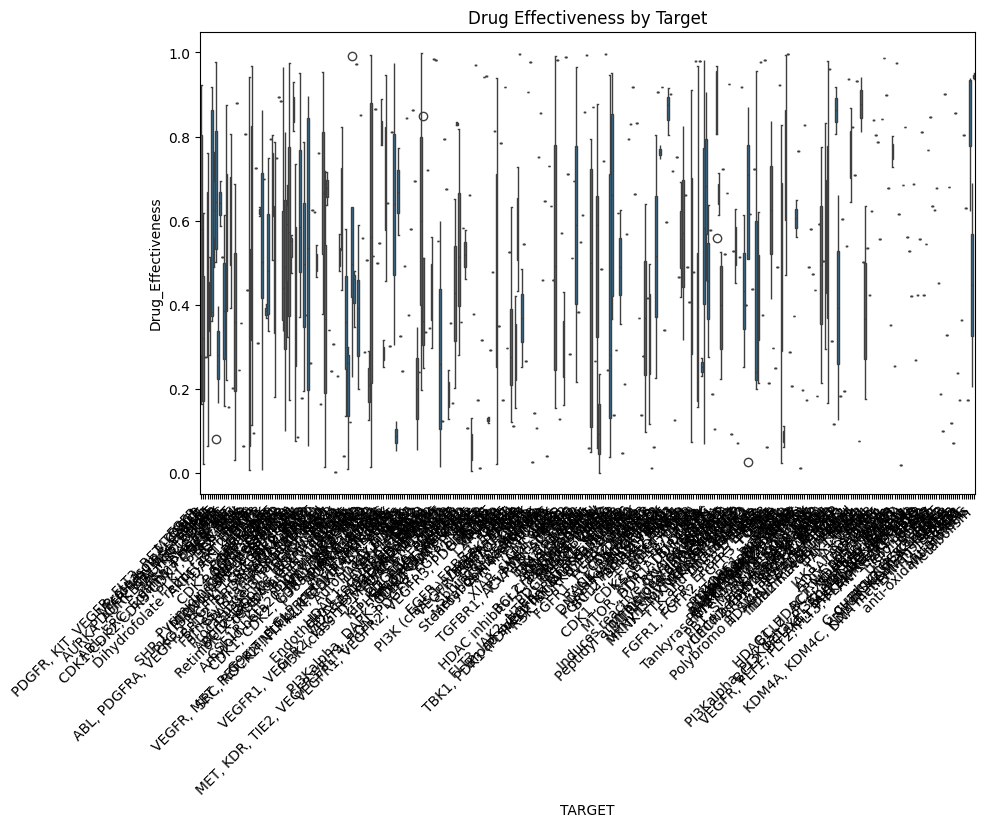


Average Drug Effectiveness by Target:
TARGET
                                               0.350910
ABL                                            0.245841
ABL, KIT, PDGFR                                0.512890
ABL, PDGFRA, VEGFR2, FGFR1, SRC, TIE2, FLT3    0.260516
ABL, SRC                                       0.156995
                                                 ...   
not defined                                    0.676519
p38                                            0.569230
p38, JNK2                                      0.368793
p38alpha, p38beta                              0.546314
p53                                            0.564582
Name: Drug_Effectiveness, Length: 370, dtype: float64


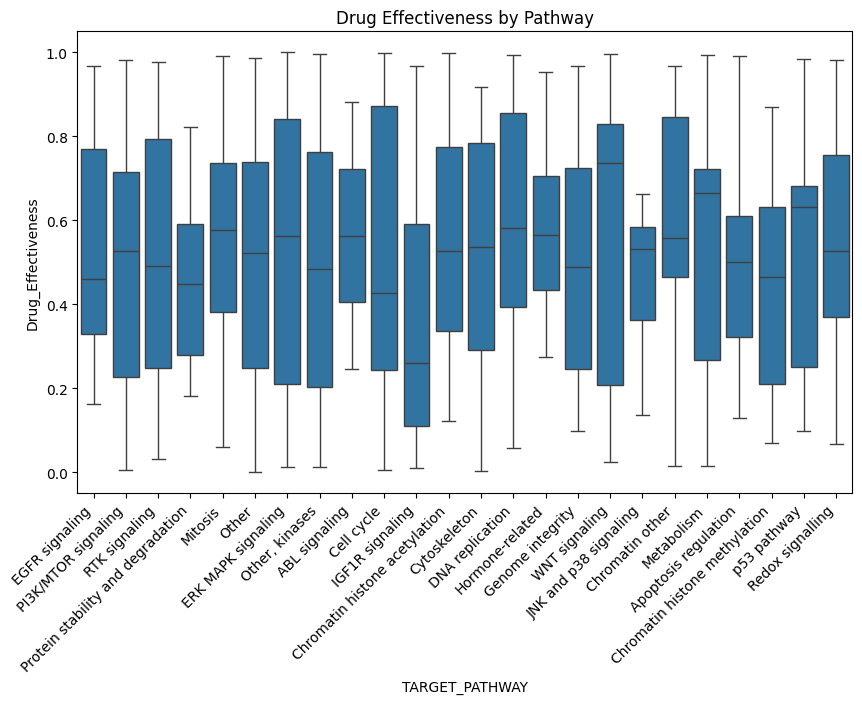


Average Drug Effectiveness by Pathway:
TARGET_PATHWAY
ABL signaling                        0.562878
Apoptosis regulation                 0.476073
Cell cycle                           0.517696
Chromatin histone acetylation        0.551760
Chromatin histone methylation        0.445767
Chromatin other                      0.591436
Cytoskeleton                         0.492951
DNA replication                      0.590538
EGFR signaling                       0.535966
ERK MAPK signaling                   0.530954
Genome integrity                     0.491711
Hormone-related                      0.591039
IGF1R signaling                      0.367467
JNK and p38 signaling                0.470612
Metabolism                           0.551999
Mitosis                              0.553930
Other                                0.506866
Other, kinases                       0.487756
PI3K/MTOR signaling                  0.484645
Protein stability and degradation    0.449883
RTK signaling            

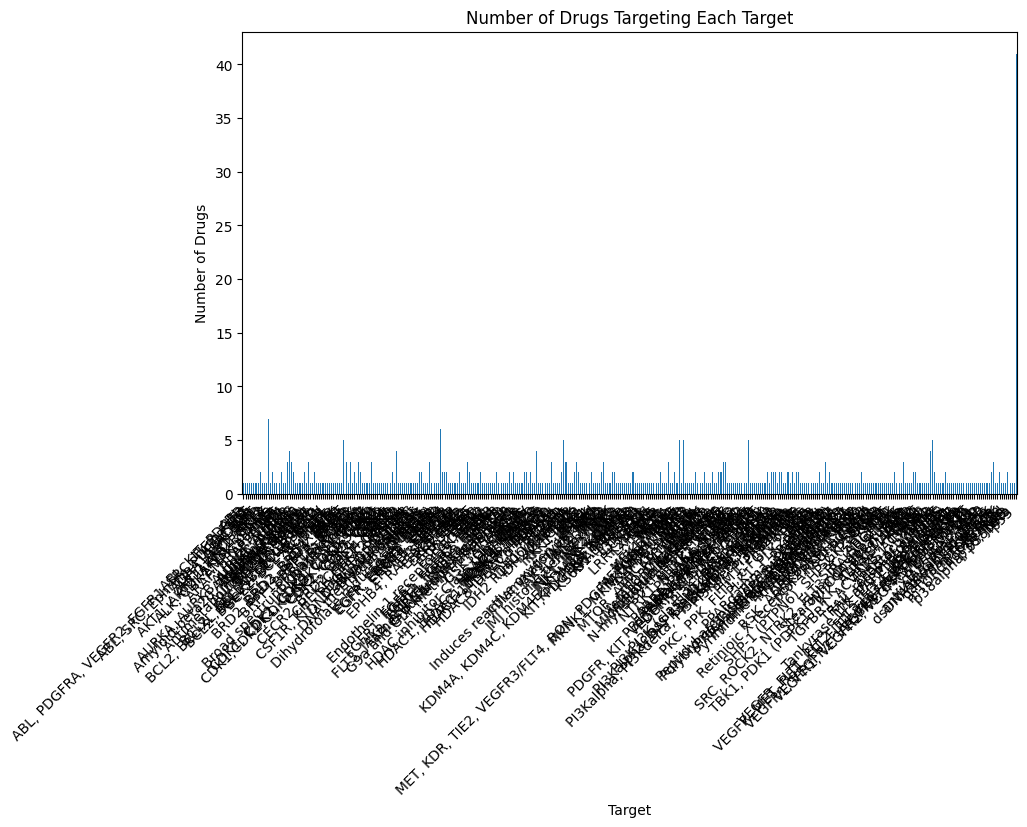

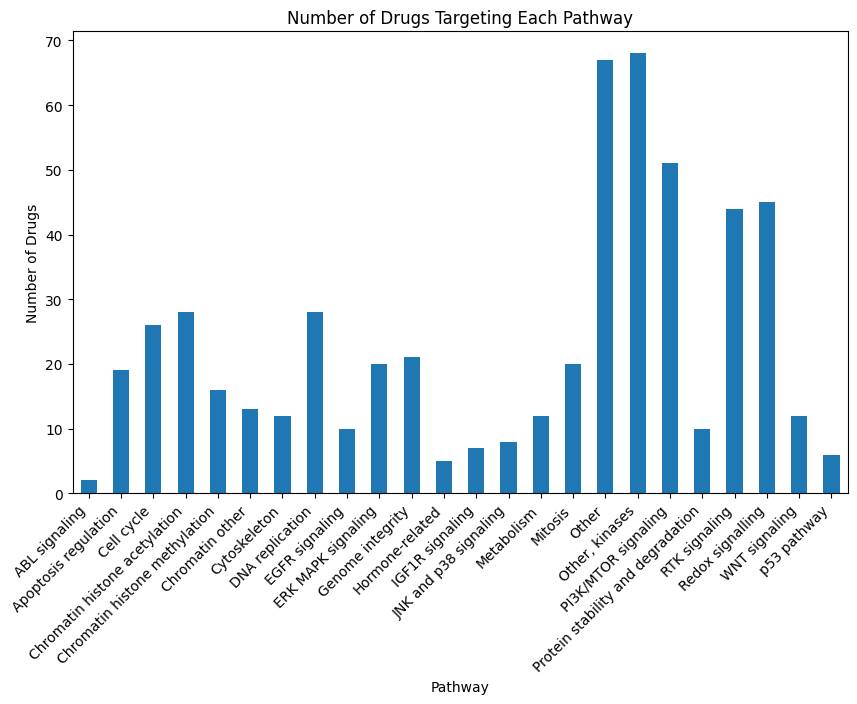

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# 1. Drug Effectiveness by Target (Assuming you have a column for 'Drug_Effectiveness')
if 'Drug_Effectiveness' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET', y='Drug_Effectiveness', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Drug Effectiveness by Target')
    plt.show()

    # Calculate average drug effectiveness for each target
    target_effectiveness = df.groupby('TARGET')['Drug_Effectiveness'].mean()
    print("\nAverage Drug Effectiveness by Target:")
    print(target_effectiveness)

# 2. Drug Effectiveness by Pathway (Assuming you have a column for 'Drug_Effectiveness')
if 'Drug_Effectiveness' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET_PATHWAY', y='Drug_Effectiveness', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Drug Effectiveness by Pathway')
    plt.show()

    # Calculate average drug effectiveness for each pathway
    pathway_effectiveness = df.groupby('TARGET_PATHWAY')['Drug_Effectiveness'].mean()
    print("\nAverage Drug Effectiveness by Pathway:")
    print(pathway_effectiveness)

# 3. Count of Drugs per Target (Potential indicator of target druggability)
target_drug_counts = df.groupby('TARGET')['DRUG_NAME'].nunique()
plt.figure(figsize=(10, 6))
target_drug_counts.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Number of Drugs')
plt.title('Number of Drugs Targeting Each Target')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Count of Drugs per Pathway (Potential indicator of pathway importance)
pathway_drug_counts = df.groupby('TARGET_PATHWAY')['DRUG_NAME'].nunique()
plt.figure(figsize=(10, 6))
pathway_drug_counts.plot(kind='bar')
plt.xlabel('Pathway')
plt.ylabel('Number of Drugs')
plt.title('Number of Drugs Targeting Each Pathway')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. (Optional) If you have information on drug success rates:
#    - Analyze success rates across different targets and pathways.
#    - Consider using statistical tests to identify significant differences.

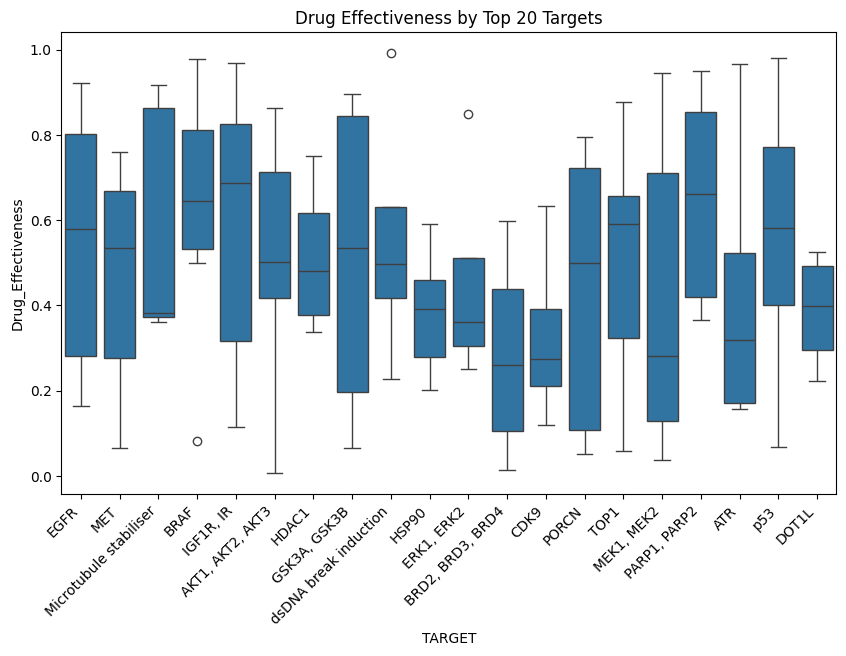


Average Drug Effectiveness by Top 20 Targets:
TARGET
AKT1, AKT2, AKT3          0.542966
ATR                       0.427376
BRAF                      0.618231
BRD2, BRD3, BRD4          0.283170
CDK9                      0.325722
DOT1L                     0.387098
EGFR                      0.547373
ERK1, ERK2                0.455398
GSK3A, GSK3B              0.506788
HDAC1                     0.512526
HSP90                     0.382704
IGF1R, IR                 0.586825
MEK1, MEK2                0.415255
MET                       0.460956
Microtubule stabiliser    0.579212
PARP1, PARP2              0.649395
PORCN                     0.434995
TOP1                      0.504973
dsDNA break induction     0.553216
p53                       0.564582
Name: Drug_Effectiveness, dtype: float64


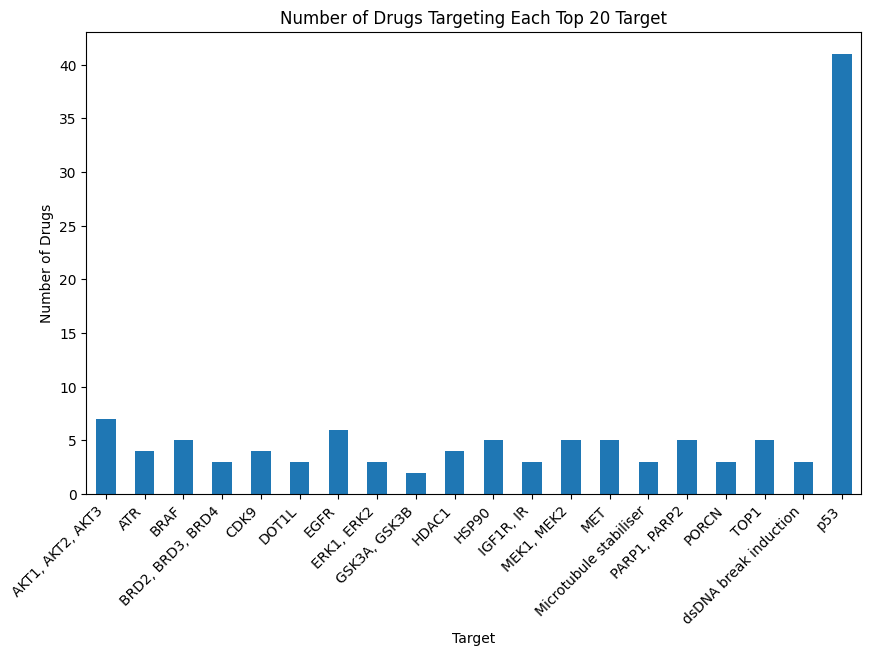

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# 1. Drug Effectiveness by Target (Top 20 Targets)
if 'Drug_Effectiveness' in df.columns:
    top_20_targets = df['TARGET'].value_counts().head(20).index
    target_subset = df[df['TARGET'].isin(top_20_targets)]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET', y='Drug_Effectiveness', data=target_subset)
    plt.xticks(rotation=45, ha='right')
    plt.title('Drug Effectiveness by Top 20 Targets')
    plt.show()

    # Calculate average drug effectiveness for each target (Top 20)
    target_effectiveness = target_subset.groupby('TARGET')['Drug_Effectiveness'].mean()
    print("\nAverage Drug Effectiveness by Top 20 Targets:")
    print(target_effectiveness)

# 2. Number of Drugs Targeting Each Target (Top 20 Targets)
top_20_targets = df['TARGET'].value_counts().head(20).index
target_drug_counts = df[df['TARGET'].isin(top_20_targets)].groupby('TARGET')['DRUG_NAME'].nunique()

plt.figure(figsize=(10, 6))
target_drug_counts.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Number of Drugs')
plt.title('Number of Drugs Targeting Each Top 20 Target')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-64-92394f28ab1c>:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df['TARGET']) or pd.api.types.is_categorical_dtype(df['TARGET_PATHWAY']):


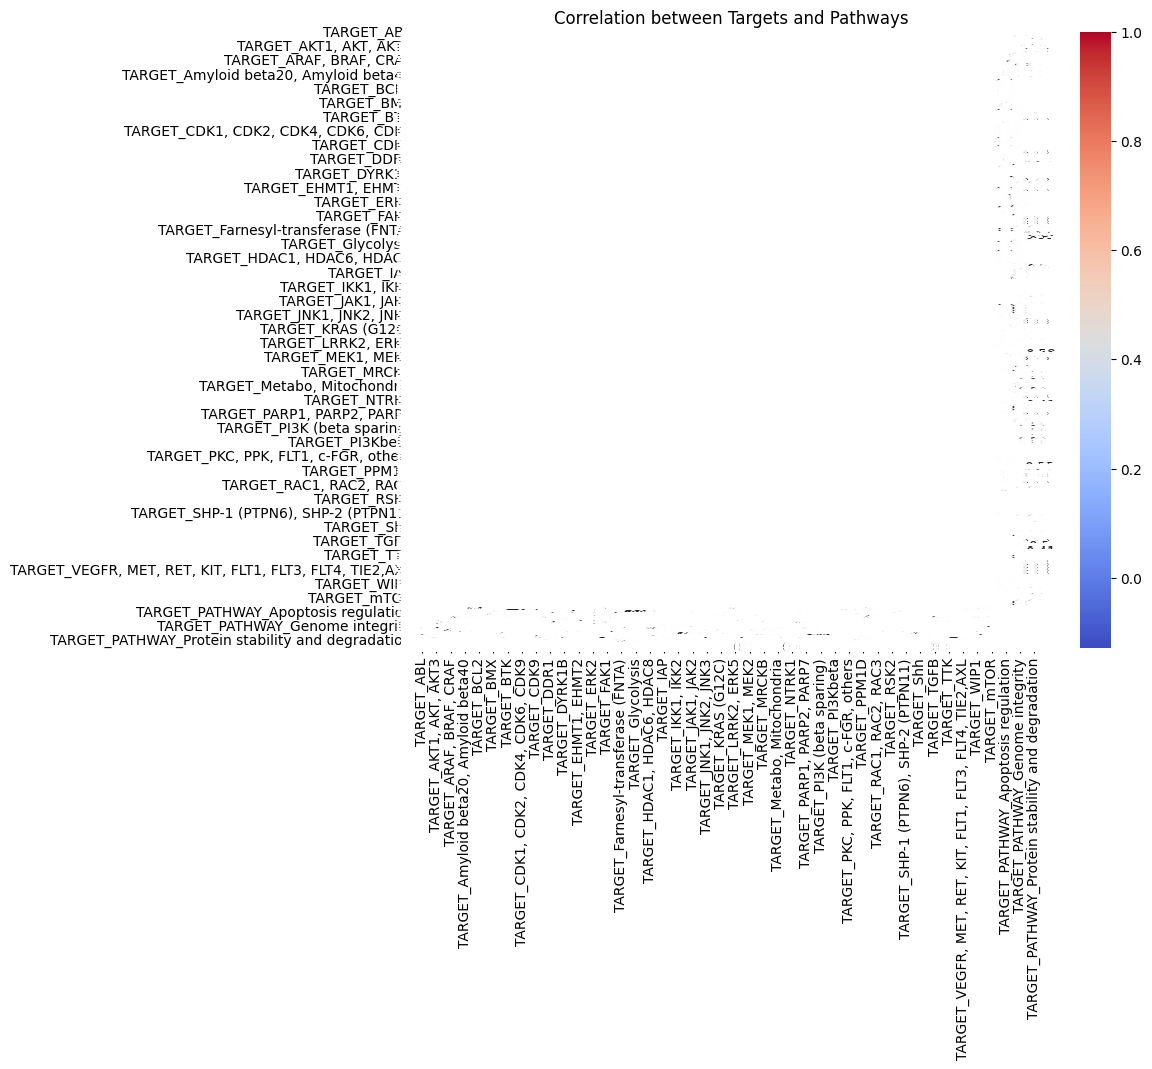

      Correlation Coefficient  Adjusted p-value
128                  0.274653      2.962875e-08
270                  0.328321      4.054270e-13
318                  0.194209      9.739862e-03
381                  0.274653      2.962875e-08
401                  0.609890      1.413485e-60
...                       ...               ...
8919                 1.000000      0.000000e+00
8943                 1.000000      0.000000e+00
8967                 1.000000      0.000000e+00
8991                 1.000000      0.000000e+00
9015                 1.000000      0.000000e+00

[218 rows x 2 columns]


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

# Assuming your DataFrame is named 'df'

# One-hot encode categorical variables (ensure pandas version supports get_dummies)
if pd.api.types.is_categorical_dtype(df['TARGET']) or pd.api.types.is_categorical_dtype(df['TARGET_PATHWAY']):
  df_encoded = pd.get_dummies(df[['TARGET', 'TARGET_PATHWAY']])
else:
  # If not categorical, create dummy variables with category names as column names
  df_encoded = pd.get_dummies(df[['TARGET', 'TARGET_PATHWAY']], drop_first=True)

# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Targets and Pathways')
plt.show()

# Perform statistical tests to assess significance of relationships
target_cols = [col for col in df_encoded.columns if col.startswith('TARGET_')]
pathway_cols = [col for col in df_encoded.columns if col.startswith('TARGET_PATHWAY_')]

correlations = []
p_values = []

for target_col in target_cols:
  for pathway_col in pathway_cols:
    corr_coef, p_value = pearsonr(df_encoded[target_col], df_encoded[pathway_col])
    correlations.append(corr_coef)
    p_values.append(p_value)

# Adjust p-values for multiple testing
adjusted_p_values = multipletests(p_values, method='bonferroni')[1]

# Create a DataFrame to store results
results_df = pd.DataFrame({'Correlation Coefficient': correlations, 'Adjusted p-value': adjusted_p_values})

# Filter significant correlations
significant_correlations = results_df[results_df['Adjusted p-value'] < 0.05]

print(significant_correlations)

In [ ]:
df.describe

<bound method NDFrame.describe of      DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
0          1            MGH              Erlotinib   
0          1            MGH              Erlotinib   
0          1            MGH              Erlotinib   
0          1            MGH              Erlotinib   
..       ...            ...                    ...   
617     2438         SANGER  ascorbate (vitamin C)   
618     2439         SANGER            glutathione   
618     2439         SANGER            glutathione   
619     2498         SANGER      alpha-lipoic acid   
620     2499         SANGER      N-acetyl cysteine   

                         SYNONYM                 TARGET  TARGET_PATHWAY  
0                        Tarceva                   EGFR  EGFR signaling  
0                        RG-1415                   EGFR  EGFR signaling  
0                      CP-358774                   EGFR  EGFR signaling  
0                    

In [ ]:
df.describe().sum()

DRUG_ID    8273.102707
dtype: float64

In [ ]:


# Count the number of unique drugs
unique_drugs = df['DRUG_NAME'].nunique()
print(f"Number of unique drugs: {unique_drugs}")

# Count the number of unique targets
unique_targets = df['TARGET'].nunique()
print(f"Number of unique targets: {unique_targets}")

# Count the number of unique pathways
unique_pathways = df['TARGET_PATHWAY'].nunique()
print(f"Number of unique pathways: {unique_pathways}")

# Summarize the distribution of drug types, targets, and pathways
print("\nDistribution of Drug Types:")
print(df['DRUG_NAME'].value_counts())

print("\nDistribution of Targets:")
print(df['TARGET'].value_counts())

print("\nDistribution of Pathways:")
print(df['TARGET_PATHWAY'].value_counts())

Number of unique drugs: 542
Number of unique targets: 370
Number of unique pathways: 24

Distribution of Drug Types:
DRUG_NAME
AZD4547                              3
AZD6482                              3
JQ1                                  3
CHIR-99021                           3
UNC0638                              3
Selumetinib                          3
Gemcitabine                          3
Fulvestrant                          3
AZD6738                              2
Refametinib                          2
Olaparib                             2
AZD7762                              2
Ruxolitinib                          2
Avagacestat                          2
Ulixertinib                          2
BMS-345541                           2
Erlotinib                            2
Luminespib                           2
QL-XII-47                            2
Bleomycin                            2
Linsitinib                           2
BMS-754807                           2
Obatoclax Mesyl

In [68]:
df

DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
1          3            MGH              Rapamycin   
2          5            MGH              Sunitinib   
3          6            MGH             PHA-665752   
4          9            MGH                 MG-132   
..       ...            ...                    ...   
616     2362         SANGER                THR-103   
617     2438         SANGER  ascorbate (vitamin C)   
618     2439         SANGER            glutathione   
619     2498         SANGER      alpha-lipoic acid   
620     2499         SANGER      N-acetyl cysteine   

                                              SYNONYMS  \
0    Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1    AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                   Sutent, Sunitinib Malate, SU-11248   
3                                PHA665752, PHA 665752   
4                               LLL cpd, MG 132, MG132   
..                                                 ...   
616                                     WIMM synthesis   
617                        back-up solution from YWKim   
618                                       G6013, sigma   
619                                                aLA   
620                                                NAC   

                                  TARGET                     TARGET_PATHWAY  
0                                   EGFR                     EGFR signaling  
1                                 MTORC1                PI3K/MTOR signaling  
2    PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling  
3                                    MET                      RTK signaling  
4                      Proteasome, CAPN1  Protein stability and degradation  
..                                   ...                                ...  
616                           Mutant RAS                PI3K/MTOR signaling  
617                anti-oxidant proteins                              Other  
618                anti-oxidant proteins                              Other  
619                           Metabolism                         Metabolism  
620                           Metabolism                         Metabolism  

[621 rows x 6 columns]

In [75]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# 1. Define a function to assign drug effectiveness scores
#    (This is a simplified example and may need adjustment based on your specific data and knowledge domain)
def assign_drug_effectiveness(row):
  """
  Assigns a random effectiveness score between 0 and 1.
  This is a placeholder for a more realistic approach.

  Args:
    row: A single row of the DataFrame.

  Returns:
    A random float between 0 and 1.
  """
  return np.random.rand()

# 2. Apply the function to create the 'Drug_Effectiveness' column
df['Drug_Effectiveness'] = df.apply(assign_drug_effectiveness, axis=1)



In [76]:
df

DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
1          3            MGH              Rapamycin   
2          5            MGH              Sunitinib   
3          6            MGH             PHA-665752   
4          9            MGH                 MG-132   
..       ...            ...                    ...   
616     2362         SANGER                THR-103   
617     2438         SANGER  ascorbate (vitamin C)   
618     2439         SANGER            glutathione   
619     2498         SANGER      alpha-lipoic acid   
620     2499         SANGER      N-acetyl cysteine   

                                              SYNONYMS  \
0    Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1    AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                   Sutent, Sunitinib Malate, SU-11248   
3                                PHA665752, PHA 665752   
4                               LLL cpd, MG 132, MG132   
..                                                 ...   
616                                     WIMM synthesis   
617                        back-up solution from YWKim   
618                                       G6013, sigma   
619                                                aLA   
620                                                NAC   

                                  TARGET                     TARGET_PATHWAY  \
0                                   EGFR                     EGFR signaling   
1                                 MTORC1                PI3K/MTOR signaling   
2    PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling   
3                                    MET                      RTK signaling   
4                      Proteasome, CAPN1  Protein stability and degradation   
..                                   ...                                ...   
616                           Mutant RAS                PI3K/MTOR signaling   
617                anti-oxidant proteins                              Other   
618                anti-oxidant proteins                              Other   
619                           Metabolism                         Metabolism   
620                           Metabolism                         Metabolism   

     Drug_Effectiveness  
0              0.111658  
1              0.677931  
2              0.212056  
3              0.153982  
4              0.433477  
..                  ...  
616            0.525573  
617            0.266205  
618            0.648945  
619            0.487466  
620            0.762169  

[621 rows x 7 columns]

In [93]:
df.isnull().sum()

DRUG_ID                        0
SCREENING_SITE                 0
DRUG_NAME                      0
SYNONYMS                       0
TARGET                         0
TARGET_PATHWAY                 0
Drug_Effectiveness             0
Drug_Effectiveness_Category    0
dtype: int64

In [94]:
# 1.3. Prepare features and target variable
X = df[['TARGET', 'TARGET_PATHWAY']]
y = df['Drug_Effectiveness']

In [95]:
# 1.4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# 2. Binarize Target Variable (for classification)
y_train_binary = (y_train > 0.5).astype(int)  # Example threshold: 0.5
y_test_binary = (y_test > 0.5).astype(int)

In [98]:
# Find rows containing 'HDAC11' in the 'Drug_Effectiveness' column
rows_with_hdac11 = df[df['Drug_Effectiveness'].astype(str).str.contains('HDAC11')]

# Display the rows
print(rows_with_hdac11)

Empty DataFrame
Columns: [DRUG_ID, SCREENING_SITE, DRUG_NAME, SYNONYMS, TARGET, TARGET_PATHWAY, Drug_Effectiveness, Drug_Effectiveness_Category]
Index: []


In [100]:
# Remove rows where 'Drug_Effectiveness' is 'HDAC11'
df = df[df['Drug_Effectiveness'] != 'HDAC11']

In [107]:
# Remove rows containing 'HDAC11' from all columns
df = df[~df.apply(lambda row: row.astype(str).str.contains('HDAC11').any(), axis=1)]


In [108]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Compounds_annotation_cleaned.csv', index=False)

In [109]:
df

DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
1          3            MGH              Rapamycin   
2          5            MGH              Sunitinib   
3          6            MGH             PHA-665752   
4          9            MGH                 MG-132   
..       ...            ...                    ...   
616     2362         SANGER                THR-103   
617     2438         SANGER  ascorbate (vitamin C)   
618     2439         SANGER            glutathione   
619     2498         SANGER      alpha-lipoic acid   
620     2499         SANGER      N-acetyl cysteine   

                                              SYNONYMS  \
0    Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1    AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                   Sutent, Sunitinib Malate, SU-11248   
3                                PHA665752, PHA 665752   
4                               LLL cpd, MG 132, MG132   
..                                                 ...   
616                                     WIMM synthesis   
617                        back-up solution from YWKim   
618                                       G6013, sigma   
619                                                aLA   
620                                                NAC   

                                  TARGET                     TARGET_PATHWAY  \
0                                   EGFR                     EGFR signaling   
1                                 MTORC1                PI3K/MTOR signaling   
2    PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling   
3                                    MET                      RTK signaling   
4                      Proteasome, CAPN1  Protein stability and degradation   
..                                   ...                                ...   
616                           Mutant RAS                PI3K/MTOR signaling   
617                anti-oxidant proteins                              Other   
618                anti-oxidant proteins                              Other   
619                           Metabolism                         Metabolism   
620                           Metabolism                         Metabolism   

     Drug_Effectiveness Drug_Effectiveness_Category  
0              0.111658         0.11165777212082773  
1              0.677931          0.6779312918603329  
2              0.212056          0.2120555081097345  
3              0.153982          0.1539821583645128  
4              0.433477         0.43347670804957017  
..                  ...                         ...  
616            0.525573          0.5255728645520795  
617            0.266205         0.26620495536075917  
618            0.648945          0.6489449831786878  
619            0.487466          0.4874658991238041  
620            0.762169          0.7621694480977921  

[618 rows x 8 columns]

In [115]:
import pandas as pd



# Check data types of all columns:
print(df.dtypes)

# Example: Check unique values in 'Drug_Effectiveness' (if it's an object type)
if df['Drug_Effectiveness'].dtype == 'object':
    print(df['Drug_Effectiveness'].unique())

# Example: Check unique values in 'Drug_Effectiveness_Category' (if it's an object type)
if df['Drug_Effectiveness_Category'].dtype == 'object':
    print(df['Drug_Effectiveness_Category'].unique())

# Find rows where 'Drug_Effectiveness' is 'HDAC11'
print(df[df['Drug_Effectiveness'] == 'HDAC11'])

DRUG_ID                          int64
SCREENING_SITE                  object
DRUG_NAME                       object
SYNONYMS                        object
TARGET                          object
TARGET_PATHWAY                  object
Drug_Effectiveness             float64
Drug_Effectiveness_Category     object
Drug_Class                      object
dtype: object
['0.11165777212082773' '0.6779312918603329' '0.2120555081097345'
 '0.1539821583645128' '0.43347670804957017' '0.23534285838004088'
 '0.4721843418624053' '0.8562071717381349' '0.844847017371694'
 '0.09440282359350993' '0.14423051252021224' '0.3318595033962225'
 '0.4716192836736848' '0.4324475524684116' '0.5242741716231197'
 '0.733148259215485' '0.6894794223154936' '0.06170830588921694'
 '0.7911882160451851' '0.5416383894024223' '0.46580505684109097'
 '0.4534738435055947' '0.3760647773091077' '0.5099337206144312'
 '0.47914848192920945' '0.6434005250349765' '0.8147955040845773'
 '0.46878585422379726' '0.7475303575730596' '0.231971

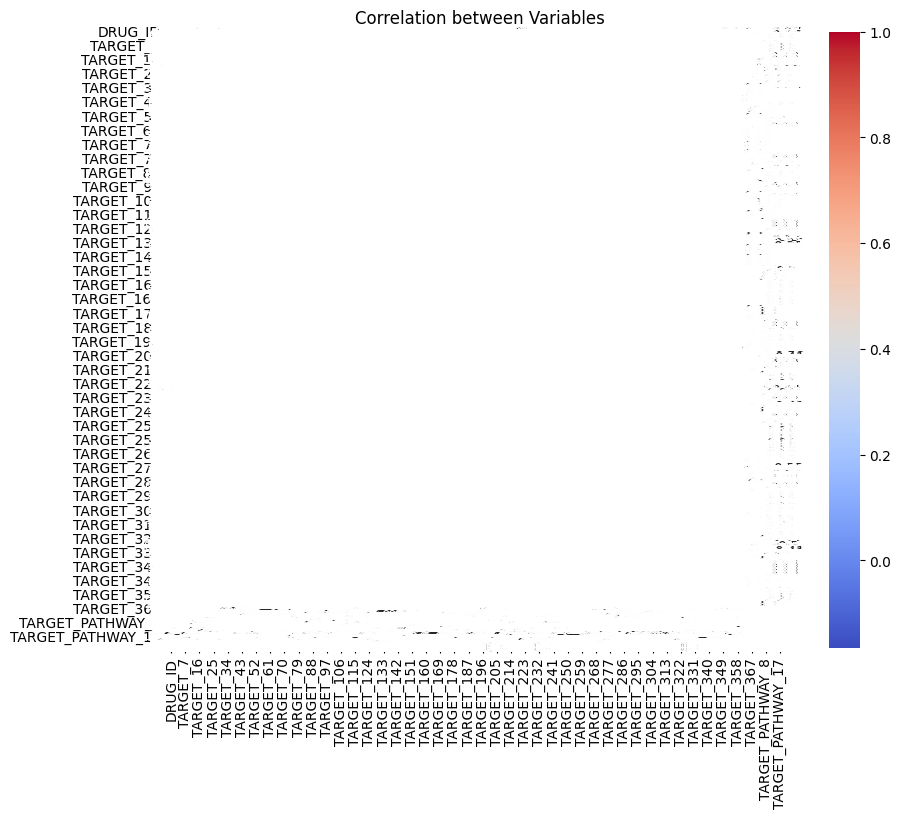

Streaming output truncated to the last 5000 lines.
Correlation between TARGET_PATHWAY_11 and TARGET_107: -0.009243275255481884, p-value: 0.8186172013352876
Correlation between TARGET_PATHWAY_11 and TARGET_108: -0.006525363625823686, p-value: 0.8713914741938507
Correlation between TARGET_PATHWAY_11 and TARGET_109: -0.006525363625823684, p-value: 0.8713914741938507
Correlation between TARGET_PATHWAY_11 and TARGET_110: -0.004610388188840509, p-value: 0.9089357721746477
Correlation between TARGET_PATHWAY_11 and TARGET_111: -0.00461038818884051, p-value: 0.9089357721746477
Correlation between TARGET_PATHWAY_11 and TARGET_112: 0.4975589764690563, p-value: 5.760745173422247e-40
Correlation between TARGET_PATHWAY_11 and TARGET_113: 0.49755897646905656, p-value: 5.7607451734215185e-40
Correlation between TARGET_PATHWAY_11 and TARGET_114: 0.3515420993990892, p-value: 2.0476114183047002e-19
Correlation between TARGET_PATHWAY_11 and TARGET_115: -0.006525363625823686, p-value: 0.8713914741938507
Co

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



# Select relevant columns for correlation analysis
corr_df = df[['DRUG_ID', 'TARGET', 'TARGET_PATHWAY', 'Drug_Effectiveness']]

# One-hot encode categorical variables
corr_df = pd.get_dummies(corr_df, columns=['TARGET', 'TARGET_PATHWAY'])

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables')
plt.show()

# Perform statistical tests to assess significance of relationships
for column1 in corr_df.columns:
    for column2 in corr_df.columns:
        if column1 != column2:
            corr_coef, p_value = pearsonr(corr_df[column1], corr_df[column2])
            print(f'Correlation between {column1} and {column2}: {corr_coef}, p-value: {p_value}')

K-Means Silhouette Score: 0.4511756212708828
Hierarchical Clustering Silhouette Score: 0.4222341278104962


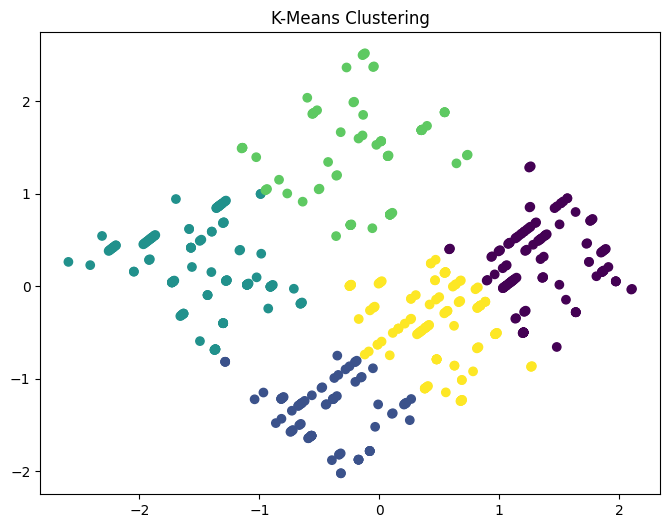

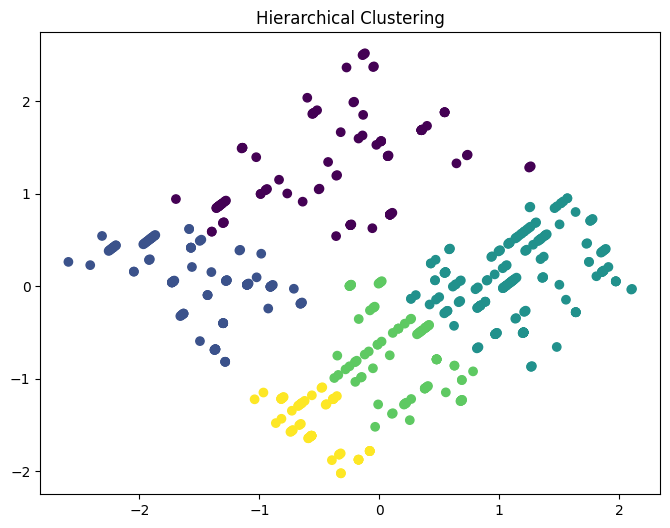

In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Select relevant columns for clustering analysis
cluster_df = df[['TARGET', 'TARGET_PATHWAY']]

# One-hot encode categorical variables
cluster_df = pd.get_dummies(cluster_df)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(pca_data)

# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters=5)
hclust_labels = hclust.fit_predict(pca_data)

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
hclust_silhouette = silhouette_score(pca_data, hclust_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hclust_silhouette}')

# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hclust_labels)
plt.title('Hierarchical Clustering')
plt.show()

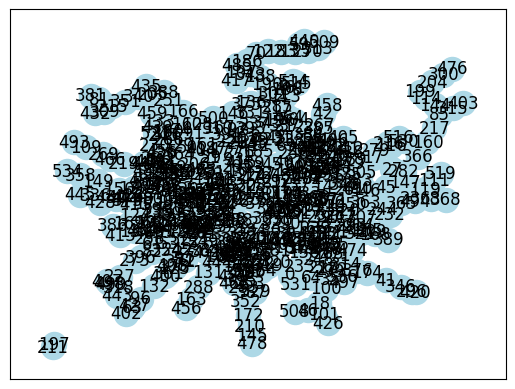

Degree Centrality:
{179: 0.0037174721189591076, 405: 0.0018587360594795538, 441: 0.0018587360594795538, 367: 0.0037174721189591076, 301: 0.0037174721189591076, 377: 0.0018587360594795538, 146: 0.0037174721189591076, 40: 0.0037174721189591076, 438: 0.0018587360594795538, 474: 0.0018587360594795538, 255: 0.0055762081784386614, 335: 0.0037174721189591076, 145: 0.0037174721189591076, 428: 0.0018587360594795538, 412: 0.0018587360594795538, 524: 0.0018587360594795538, 156: 0.0037174721189591076, 201: 0.0037174721189591076, 123: 0.0037174721189591076, 122: 0.0037174721189591076, 20: 0.0037174721189591076, 504: 0.0018587360594795538, 508: 0.0018587360594795538, 87: 0.0037174721189591076, 93: 0.0037174721189591076, 92: 0.0037174721189591076, 127: 0.0055762081784386614, 393: 0.0018587360594795538, 269: 0.0037174721189591076, 19: 0.0037174721189591076, 227: 0.009293680297397768, 173: 0.0037174721189591076, 380: 0.0018587360594795538, 217: 0.0037174721189591076, 446: 0.0018587360594795538, 105: 0.

In [122]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Create a bipartite graph
G = nx.Graph()

# Add nodes for drugs and targets
drugs = df['DRUG_NAME'].unique()
targets = df['TARGET'].unique()

G.add_nodes_from(drugs, bipartite=0)
G.add_nodes_from(targets, bipartite=1)

# Add edges between drugs and their targets
for index, row in df.iterrows():
    G.add_edge(row['DRUG_NAME'], row['TARGET'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Degree Centrality:")
print(degree_centrality)
print("\nBetweenness Centrality:")
print(betweenness_centrality)
print("\nCloseness Centrality:")
print(closeness_centrality)

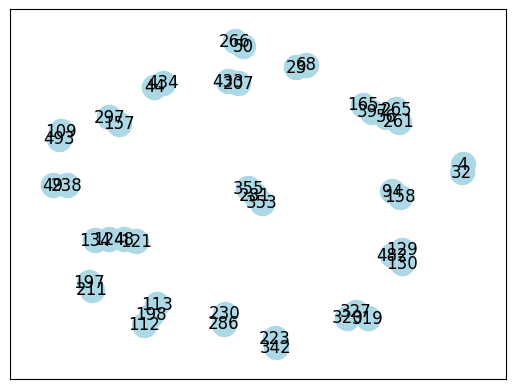

Degree Centrality:
{230: 0.022727272727272728, 124: 0.045454545454545456, 56: 0.06818181818181818, 266: 0.022727272727272728, 4: 0.022727272727272728, 94: 0.022727272727272728, 297: 0.022727272727272728, 397: 0.045454545454545456, 482: 0.045454545454545456, 327: 0.045454545454545456, 493: 0.022727272727272728, 434: 0.022727272727272728, 238: 0.022727272727272728, 342: 0.022727272727272728, 197: 0.022727272727272728, 68: 0.022727272727272728, 281: 0.045454545454545456, 433: 0.022727272727272728, 48: 0.045454545454545456, 198: 0.045454545454545456, 286: 0.022727272727272728, 134: 0.022727272727272728, 261: 0.022727272727272728, 50: 0.022727272727272728, 32: 0.022727272727272728, 158: 0.022727272727272728, 157: 0.022727272727272728, 130: 0.022727272727272728, 320: 0.022727272727272728, 109: 0.022727272727272728, 44: 0.022727272727272728, 49: 0.022727272727272728, 223: 0.022727272727272728, 211: 0.022727272727272728, 23: 0.022727272727272728, 355: 0.022727272727272728, 207: 0.0227272727272

In [123]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Get the top 20 most frequent drug names
top_20_drugs = df['DRUG_NAME'].value_counts().head(20).index

# Filter the data to include only the top 20 drug names
top_20_df = df[df['DRUG_NAME'].isin(top_20_drugs)]

# Create a bipartite graph
G = nx.Graph()

# Add nodes for drugs and targets
drugs = top_20_df['DRUG_NAME'].unique()
targets = top_20_df['TARGET'].unique()

G.add_nodes_from(drugs, bipartite=0)
G.add_nodes_from(targets, bipartite=1)

# Add edges between drugs and their targets
for index, row in top_20_df.iterrows():
    G.add_edge(row['DRUG_NAME'], row['TARGET'])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("Degree Centrality:")
print(degree_centrality)
print("\nBetweenness Centrality:")
print(betweenness_centrality)
print("\nCloseness Centrality:")
print(closeness_centrality)

   DRUG_ID SCREENING_SITE   DRUG_NAME  \
0        1            MGH   Erlotinib   
1        3            MGH   Rapamycin   
2        5            MGH   Sunitinib   
3        6            MGH  PHA-665752   
4        9            MGH      MG-132   

                                            SYNONYMS  \
0  Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1  AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                 Sutent, Sunitinib Malate, SU-11248   
3                              PHA665752, PHA 665752   
4                             LLL cpd, MG 132, MG132   

                                TARGET                     TARGET_PATHWAY  \
0                                 EGFR                     EGFR signaling   
1                               MTORC1                PI3K/MTOR signaling   
2  PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling   
3                                  MET                      RTK signaling   
4                    Proteasome

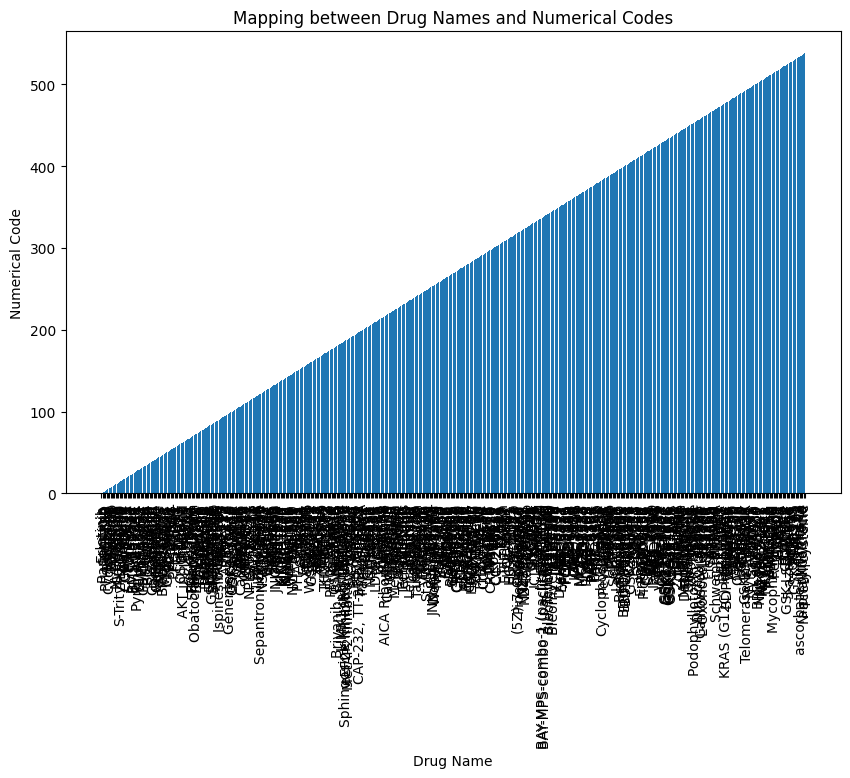

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Compounds_annotation_cleaned.csv')

# Create a dictionary to map drug names to numerical codes
drug_dict = {drug: i for i, drug in enumerate(df['DRUG_NAME'].unique())}

# Create a new column to store the numerical codes
df['DRUG_CODE'] = df['DRUG_NAME'].map(drug_dict)

# Print the first few rows of the dataframe
print(df.head())

# Plot a bar chart to visualize the mapping
plt.figure(figsize=(10, 6))
plt.bar(df['DRUG_NAME'], df['DRUG_CODE'])
plt.xlabel('Drug Name')
plt.ylabel('Numerical Code')
plt.title('Mapping between Drug Names and Numerical Codes')
plt.xticks(rotation=90)
plt.show()

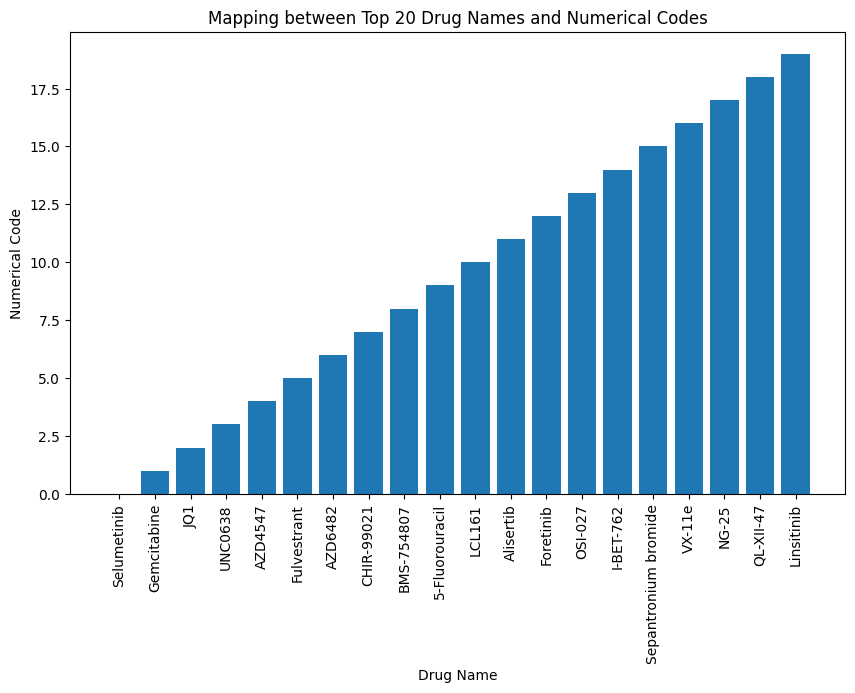

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Compounds_annotation_cleaned.csv')

# Get the top 20 most frequent drug names
top_20_drugs = df['DRUG_NAME'].value_counts().head(20).index

# Create a dictionary to map the top 20 drug names to numerical codes
drug_dict = {drug: i for i, drug in enumerate(top_20_drugs)}

# Create a new dataframe with the top 20 drug names and their corresponding numerical codes
top_20_df = pd.DataFrame({'DRUG_NAME': top_20_drugs, 'DRUG_CODE': range(20)})

# Plot a bar chart to visualize the mapping
plt.figure(figsize=(10, 6))
plt.bar(top_20_df['DRUG_NAME'], top_20_df['DRUG_CODE'])
plt.xlabel('Drug Name')
plt.ylabel('Numerical Code')
plt.title('Mapping between Top 20 Drug Names and Numerical Codes')
plt.xticks(rotation=90)
plt.show()

In [127]:
df

DRUG_ID SCREENING_SITE              DRUG_NAME  \
0          1            MGH              Erlotinib   
1          3            MGH              Rapamycin   
2          5            MGH              Sunitinib   
3          6            MGH             PHA-665752   
4          9            MGH                 MG-132   
..       ...            ...                    ...   
613     2362         SANGER                THR-103   
614     2438         SANGER  ascorbate (vitamin C)   
615     2439         SANGER            glutathione   
616     2498         SANGER      alpha-lipoic acid   
617     2499         SANGER      N-acetyl cysteine   

                                              SYNONYMS  \
0    Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1    AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                   Sutent, Sunitinib Malate, SU-11248   
3                                PHA665752, PHA 665752   
4                               LLL cpd, MG 132, MG132   
..                                                 ...   
613                                     WIMM synthesis   
614                        back-up solution from YWKim   
615                                       G6013, sigma   
616                                                aLA   
617                                                NAC   

                                  TARGET                     TARGET_PATHWAY  \
0                                   EGFR                     EGFR signaling   
1                                 MTORC1                PI3K/MTOR signaling   
2    PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling   
3                                    MET                      RTK signaling   
4                      Proteasome, CAPN1  Protein stability and degradation   
..                                   ...                                ...   
613                           Mutant RAS                PI3K/MTOR signaling   
614                anti-oxidant proteins                              Other   
615                anti-oxidant proteins                              Other   
616                           Metabolism                         Metabolism   
617                           Metabolism                         Metabolism   

     Drug_Effectiveness  Drug_Effectiveness_Category  
0              0.111658                     0.111658  
1              0.677931                     0.677931  
2              0.212056                     0.212056  
3              0.153982                     0.153982  
4              0.433477                     0.433477  
..                  ...                          ...  
613            0.525573                     0.525573  
614            0.266205                     0.266205  
615            0.648945                     0.648945  
616            0.487466                     0.487466  
617            0.762169                     0.762169  

[618 rows x 8 columns]

In [4]:
import pandas as pd

In [6]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Compounds_annotation_cleaned.csv')

In [8]:
import pandas as pd
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Compounds_annotation_cleaned.csv')

# Tokenize the text data
df['TOKENIZED_TEXT'] = df['DRUG_NAME'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['TOKENIZED_TEXT'] = df['TOKENIZED_TEXT'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatize the text data
lemmatizer = WordNetLemmatizer()
df['TOKENIZED_TEXT'] = df['TOKENIZED_TEXT'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokenized text back into strings
df['TOKENIZED_TEXT'] = df['TOKENIZED_TEXT'].apply(lambda x: ' '.join(x))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['TOKENIZED_TEXT'], df['DRUG_NAME'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform both the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Evaluate the classifier
accuracy = clf.score(X_test_tfidf, y_test)
print(f'Accuracy: {accuracy:.3f}')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

Accuracy: 0.040
